In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy


class DataViz:
    
    def __init__(self):
        self.intro()
        os.makedirs(self.app_folder_loc, exist_ok=True)  # create folder 'Files' at current working directory for storing useful files
        self.important_note()
    
    @property
    def app_name(self):
        return 'DataViz'
    
    @property
    def app_folder_loc(self):
        return f'{self.app_name}Output'
    
    @property
    def author_name(self):
        return 'Osagie Elliot Aibangbee'
    
    @property
    def author_stID(self):
        return '202115576'
    
    @property
    def degree(self):
        return 'MSc Artificial Intelligence and Data Science'
    
    @property
    def module(self):
        return '771768'
    
    def intro(self):
        print(f"***{self.app_name} App***\n***November 2021***\n***By {self.author_name}***\n***Student ID: {self.author_stID}***\n***Program: {self.degree}***\n***Module: {self.module}***")
        
    def important_note(self):
        print(f"\n\nNOTE:\nThis {self.app_name} app will automatically create a folder called '{self.app_folder_loc}', " + 
              "if it does not already exist, in the current working directory.\n" +
              "This folder shall serve as a container for storing files produced by the app.")
        
    def read_csv(self, csv_fname):
        return pd.read_csv(csv_fname)
    
    def fig_writer(self, fname: str, plotter: plt.figure=None, dpi: int=150):
        plotter.get_figure().savefig(f"{self.app_folder_loc}\\{fname}", dpi=dpi, 
                                         bbox_inches='tight', pad_inches=0.5)
        return fname

In [2]:
viz_app = DataViz()

***DataViz App***
***November 2021***
***By Osagie Elliot Aibangbee***
***Student ID: 202115576***
***Program: MSc Artificial Intelligence and Data Science***
***Module: 771768***


NOTE:
This DataViz app will automatically create a folder called 'DataVizOutput', if it does not already exist, in the current working directory.
This folder shall serve as a container for storing files produced by the app.


In [3]:
fpath = 'acw_user_data.csv'
acw_df = viz_app.read_csv(fpath)

In [4]:
acw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Address Street                     1000 non-null   object 
 1   Address City                       1000 non-null   object 
 2   Address Postcode                   1000 non-null   object 
 3   Age (Years)                        1000 non-null   int64  
 4   Distance Commuted to Work (miles)  1000 non-null   float64
 5   Employer Company                   754 non-null    object 
 6   Credit Card Start Date             1000 non-null   object 
 7   Credit Card Expiry Date            1000 non-null   object 
 8   Credit Card Number                 1000 non-null   int64  
 9   Credit Card CVV                    1000 non-null   int64  
 10  Dependants                         981 non-null    float64
 11  First Name                         1000 non-null   object

In [5]:
print("Below Series shows the total number of null values present in each column of the acw_df:\n\n" +
      f"{acw_df.isnull().sum()}")

Below Series shows the total number of null values present in each column of the acw_df:

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (£)                     0
Retired                                0
Yearly Salary (£)                      0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle 

#### Based on the information displayed above, we can see that only the "Employer Company" and "Dependants" columns have null values<br>
Employer Company: 246 null values<br>
Dependants: 19 null values
<br>

In [6]:
print("First five rows in the dataframe:")
acw_df.head()

First five rows in the dataframe:


,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


___

### Task 1:
Obtain the Data Series for Salary, and Age, and calculate the following:<br> 
a. Mean Salary <br>
b. Median Age 

### SOLUTION

Step 1: <br>
Obtain a copy of the pandas Series for salary and age columns in the acw_df dataframe, <br>
and assign to separate variables, 'sal' and 'age' respectively.

In [7]:
sal = copy.deepcopy(acw_df['Yearly Salary (£)'])
age = copy.deepcopy(acw_df['Age (Years)'])

In [8]:
print(f"First five rows in the {sal.name} Series:")
sal.head()

First five rows in the Yearly Salary (£) Series:


0    72838
1    54016
2    68049
3    91337
4    18446
Name: Yearly Salary (£), dtype: int64

In [9]:
print(f"First five rows in the {age.name} Series:")
age.head()

First five rows in the Age (Years) Series:


0    89
1    46
2    22
3    56
4    57
Name: Age (Years), dtype: int64

Step 2: <br>
Get stats from both series

a) Mean of the 'Yearly Salary (£)' Series

In [10]:
print(f"Average {sal.name} of customers is £{sal.mean():.2f}")

Average Yearly Salary (£) of customers is £57814.08


b) Median value of the 'Age (Years)' Series

In [11]:
print(f"Median {age.name} of customers is {age.median():.0f} years old")

Median Age (Years) of customers is 54 years old


___

### Task 2:
Perform **univariate plots** of the following data attributes: <br>
a. ***Age***, calculating how many bins would be required for a bin_width of 5. <br>
b. ***Dependents***, fixing data errors with seaborn itself. <br>
c. ***Age*** (of default bins), ***conditioned on Marital Status*** 

### SOLUTION

***<center>a. Univariate plot for customers' Age:</center>***<br>
Calculate the number of bins (or groups) required with bin_width (or group_interval) of 5

In [12]:
min_age, max_age = age.min(), age.max()
print(f"Minumum age of customers: {min_age} years old.\nMaximum age of customers: {max_age} years old.")

Minumum age of customers: 18 years old.
Maximum age of customers: 91 years old.


In [13]:
# Range = max_age - min_age
Range = max_age - min_age
print(f"Range of customers' age: {Range} years")

Range of customers' age: 73 years


In [14]:
# num_of_bins = Range / bin_width
bin_width = 5
num_of_bins = Range/bin_width

In [15]:
print(f"Number of age groups with width of 5: {num_of_bins: .0f} groups")

Number of age groups with width of 5:  15 groups


**number of bins = 14.6 (approximately 15)**

Plotting a univariate plot (***histogram***) with bin_width of 5 (i.e, 15 bins)

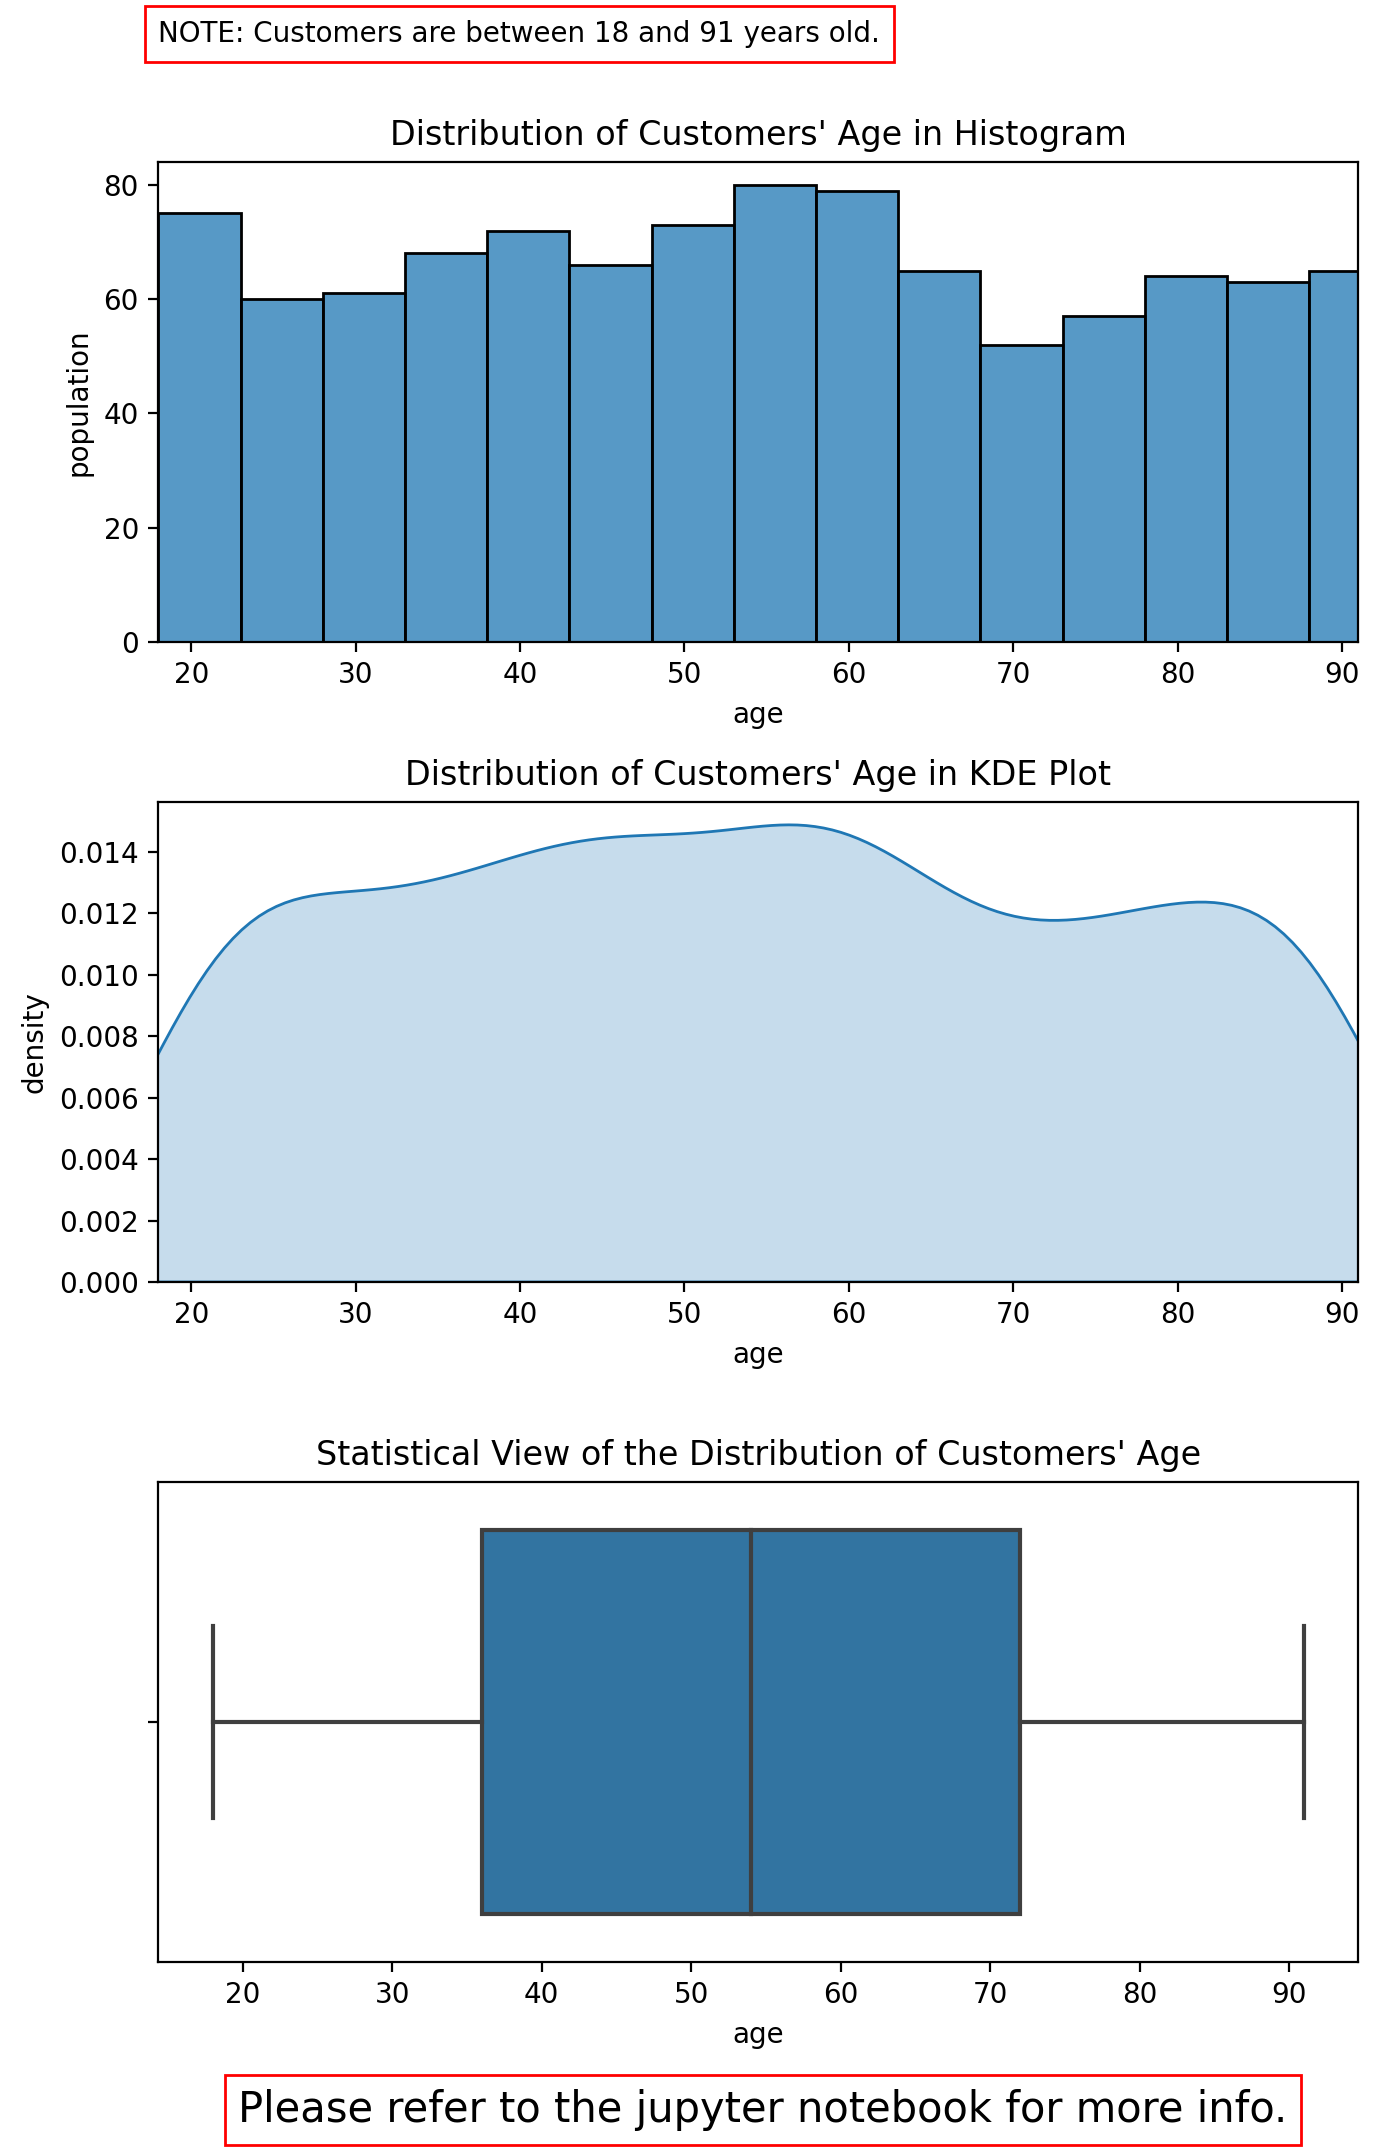

In [16]:
# create a figure canvas/window and set up its size and dots_per_inch
task_2a_fig = plt.figure(figsize=(8, 4), dpi=200)
# create two plotting areas/sections, top and bottom
top_ax, mid_ax, bot_ax = task_2a_fig.add_axes([0, 1.65, 0.75, 0.6]), task_2a_fig.add_axes([0, 0.85, 0.75, 0.6]), task_2a_fig.add_axes([0, 0, .75, 0.6])

# plot a histogram on the top section
hplot = sns.histplot(data=acw_df, x='Age (Years)', binwidth=5, ax=top_ax)
# plot a kde (kernel density estimation) on the middle section
kplot = sns.kdeplot(data=acw_df, x='Age (Years)', shade=True, ax=mid_ax)
# plot a boxplot on the bottom section
bxplot = sns.boxplot(data=acw_df, x='Age (Years)', ax=bot_ax)

# create more readable labels for x and y axes
hplot.set_xlabel("age"), hplot.set_ylabel("population")
kplot.set_xlabel("age"), kplot.set_ylabel("density")
bxplot.set_xlabel("age")

# create a title for both plots
hplot.set_title("Distribution of Customers' Age in Histogram")
kplot.set_title("Distribution of Customers' Age in KDE Plot")
bxplot.set_title("Statistical View of the Distribution of Customers' Age")

# restrict the x-axis of kdeplot to include
# only values that fall within age range
hplot.set_xlim(age.min(), age.max())
kplot.set_xlim(age.min(), age.max())

task_2a_fig.text(0, 2.4, "NOTE: Customers are between 18 and 91 years old.",
                color='black', bbox={'pad':5, 'facecolor':'white', 'edgecolor':'red'})
task_2a_fig.text(0.05, -0.2, "Please refer to the jupyter notebook for more info.",
                fontsize=15, bbox={'edgecolor':'red', 'facecolor':'white', 'pad':5})
plt.show()

NOTE:<br>
From the above histogram and kdeplot, I would say that customers' age appear to have an approximately ***uniform distribution***.<br>
That is, in general, the population of customers is spread evenly across all ages.<br>
However, the age with the fewest customer population is found between ages 68 and 78 years old.<br>
The boxplot reveals that no age population is considered an outlier.

#### To save this figure to filesystem as pdf files

In [17]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_2a_ages_distribution.pdf"
viz_app.fig_writer(file_name, task_2a_fig, dpi=300)

'task_2a_ages_distribution.pdf'

***<center>b. Dependants: fixing errors with seaborn</center>***

In [18]:
dependants = copy.deepcopy(acw_df['Dependants'])

In [19]:
print(f"The Dependants column contains {dependants.shape[0]} rows/data.\n" +
      f"And by default, it has a datatype of {dependants.dtypes}.\n" +
     f"The first 5 values are: \n{dependants[:5]}")

The Dependants column contains 1000 rows/data.
And by default, it has a datatype of float64.
The first 5 values are: 
0    3.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Dependants, dtype: float64


In [20]:
# unique values contained in the Dependants column
print(f"The Dependants column now has {dependants.dtype} datatype.\n" + 
      f"Unique values in the Dependants column: {list(dependants.unique())}")

The Dependants column now has float64 datatype.
Unique values in the Dependants column: [3.0, 1.0, 2.0, 4.0, nan, 5.0]


NOTE: <BR>
The Dependants column contains categorical values.<br>
Thus, an appropriate graph for it would be a barplot, with each unique categories displayed on the x-axis, <br>
and their number of occurrences (count) on the y-axis

In [21]:
dep_val_count = dependants.value_counts()
dep_val_count

2.0    460
1.0    255
3.0    178
4.0     54
5.0     34
Name: Dependants, dtype: int64

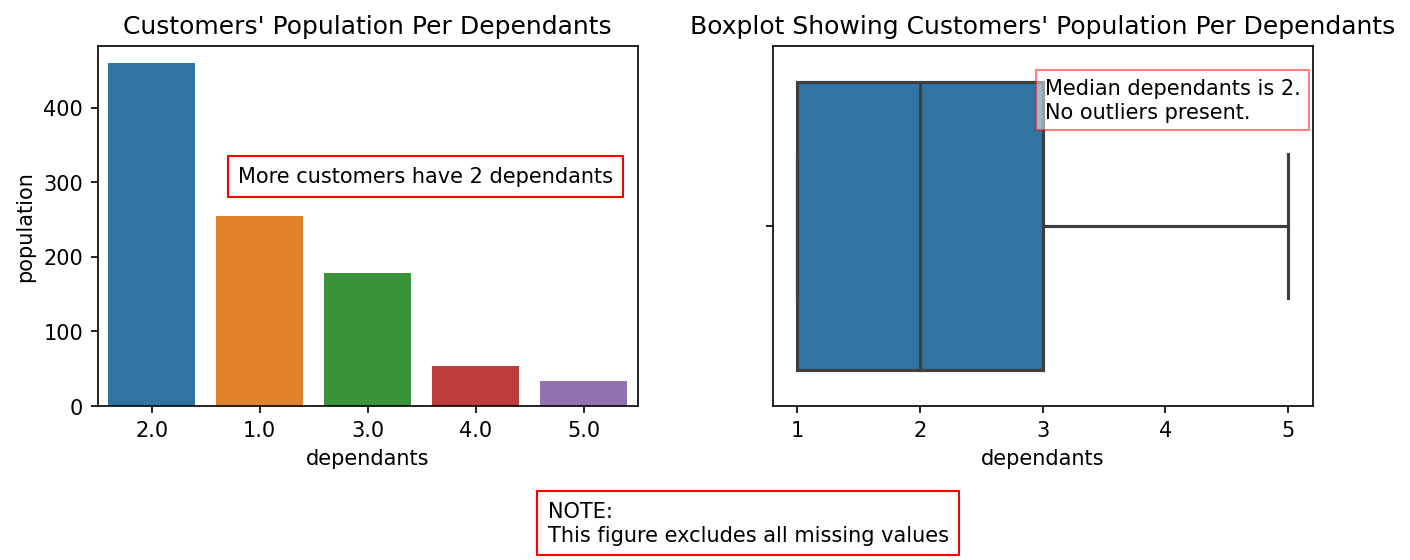

In [22]:
incomp_dependants = plt.figure(figsize=(6, 3), dpi=150, edgecolor='black')
left, right = incomp_dependants.add_axes([0, 0, 0.6, .8]), incomp_dependants.add_axes([0.75, 0, 0.6, .8])

bplot = sns.barplot(x=dep_val_count.index, y=dep_val_count, order=dep_val_count.index, ax=left)
bxplot = sns.boxplot(x=dependants, ax=right)

left.set_title("Customers' Population Per Dependants")
right.set_title("Boxplot Showing Customers' Population Per Dependants")

left.set_xlabel("dependants"), left.set_ylabel('population')
right.set_xlabel('dependants')

incomp_dependants.text(0.5, -0.3, "NOTE:\nThis figure excludes all missing values", fontsize=10,
        bbox={'edgecolor':'red', 'pad':5, 'facecolor':'white'})
bplot.text(0.8, 300, "More customers have 2 dependants",
          bbox={'edgecolor':'red', 'pad':5, 'facecolor':'white'})
bxplot.text(3.015, -0.3, "Median dependants is 2.\nNo outliers present.",
          bbox={'edgecolor':'red', 'facecolor':'white', 'alpha':0.5})
plt.show()

NOTE: <BR>
From the above plot, it is obvious that majority of customers have 1-3 dependants.<br>
***However, it is not yet clear if this info is reliable because of the exclusion of null values in this count.***<BR>
    There's need to replace the missing values with a placeholder that can be included in the count.<BR>
And then, the bar graph would be re-plotted.

#### To save this figure to filesystem as pdf files

In [23]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "2b1_dependants_distr_incomplete.pdf"
viz_app.fig_writer(file_name, incomp_dependants, dpi=300)

'2b1_dependants_distr_incomplete.pdf'

**FIXING ERRORS:**<br>
1. It would be more appropriate to ***change the Dependants column datatype*** from float to int.<br>
2. And to ***replace null values (nan) with an integer placeholder***, which in this case will be -1

1. Changing the datatype

In [24]:
dependants = dependants.astype(pd.Int64Dtype())
dependants

0      3
1      1
2      1
3      2
4      2
      ..
995    2
996    2
997    1
998    3
999    1
Name: Dependants, Length: 1000, dtype: Int64

In [25]:
# replacing the old column in the acw_df (having float datatype) with the new output Series (having int datatype)
acw_df['Dependants'] = dependants

In [26]:
# checking the new 'Dependants' datatype, as well as,
# each unique values contained in the Dependants column
print(f"The Dependants column now has {dependants.dtype} datatype.\n" + 
      f"Unique values in the Dependants column: {list(dependants.unique())}")

The Dependants column now has Int64 datatype.
Unique values in the Dependants column: [3, 1, 2, 4, <NA>, 5]


Assessing the quantity of missing data in the Dependants column.

In [27]:
# checking the percentage data that is missing in the Dependants column,
# as well as that of non-missing data
null_dep = round(dependants.isnull().sum()/dependants.shape[0], 2)
print(f"{null_dep*100}% of data in the Dependants column is null/missing.")

2.0% of data in the Dependants column is null/missing.


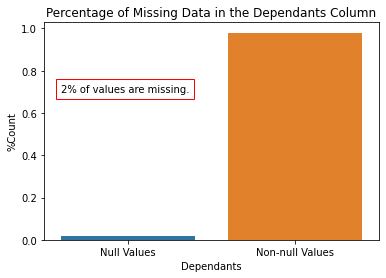

In [28]:
dependants_null_perc = sns.barplot(x=['Null Values', 'Non-null Values'], y=[null_dep, 1-null_dep])
plt.title("Percentage of Missing Data in the Dependants Column")
plt.ylabel("%Count"); plt.xlabel('Dependants')
plt.text(-0.4, 0.7, "2% of values are missing.",
                         bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})
plt.show()

The above plot shows that only 2% of data is missing, which in my opinion is insignificant.

#### To save this figure to filesystem as pdf files

In [29]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "2b2_dependants_missing_data_perc.pdf"
viz_app.fig_writer(file_name, dependants_null_perc, dpi=300)

'2b2_dependants_missing_data_perc.pdf'

In [30]:
# Getting the index location of each row in the Dependants column containing missing data
null_index = acw_df.loc[acw_df['Dependants'].isnull()].index.to_list()
print(f"By default, there are {dependants.isnull().sum()} null values in the Dependants column.\n" +
      f"Each null value is at {null_index}")

By default, there are 19 null values in the Dependants column.
Each null value is at [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [31]:
# display the values at some missing rows
acw_df.loc[acw_df.index.isin(null_index[:3]), ['Dependants']]

,Dependants
21,<NA>
109,<NA>
179,<NA>


2. Replace NA values with integer placeholder -1

In [32]:
# create new Series where each null value is replaced with -1
# and assign to variable 'dependants'
dependants = dependants.fillna(-1)

In [33]:
# replace the existing Dependants column with the new dependants Series
acw_df['Dependants'] = dependants

In [34]:
# display the value at some missing rows
# null values should now be represented by the placeholder
acw_df.loc[acw_df.index.isin(null_index[:3]), ['Dependants']]

,Dependants
21,-1
109,-1
179,-1


In [35]:
# count the number of occurrences of each unique value (including -1)
# and sort the output series in descending order of their counts
dep_val_count = dependants.value_counts().sort_values(ascending=False)

In [36]:
print("Number of occurrences of each unique value in the Dependants column:")
dep_val_count

Number of occurrences of each unique value in the Dependants column:


 2    460
 1    255
 3    178
 4     54
 5     34
-1     19
Name: Dependants, dtype: Int64

In [37]:
dep_freq_perc = round(dep_val_count/dependants.shape[0], 2)

In [38]:
print("Percentage count of the unique values in the Dependants column:")
dep_freq_perc

Percentage count of the unique values in the Dependants column:


 2    0.46
 1    0.26
 3    0.18
 4    0.05
 5    0.03
-1    0.02
Name: Dependants, dtype: Float64

***Now we plot the above details in a bar graph***

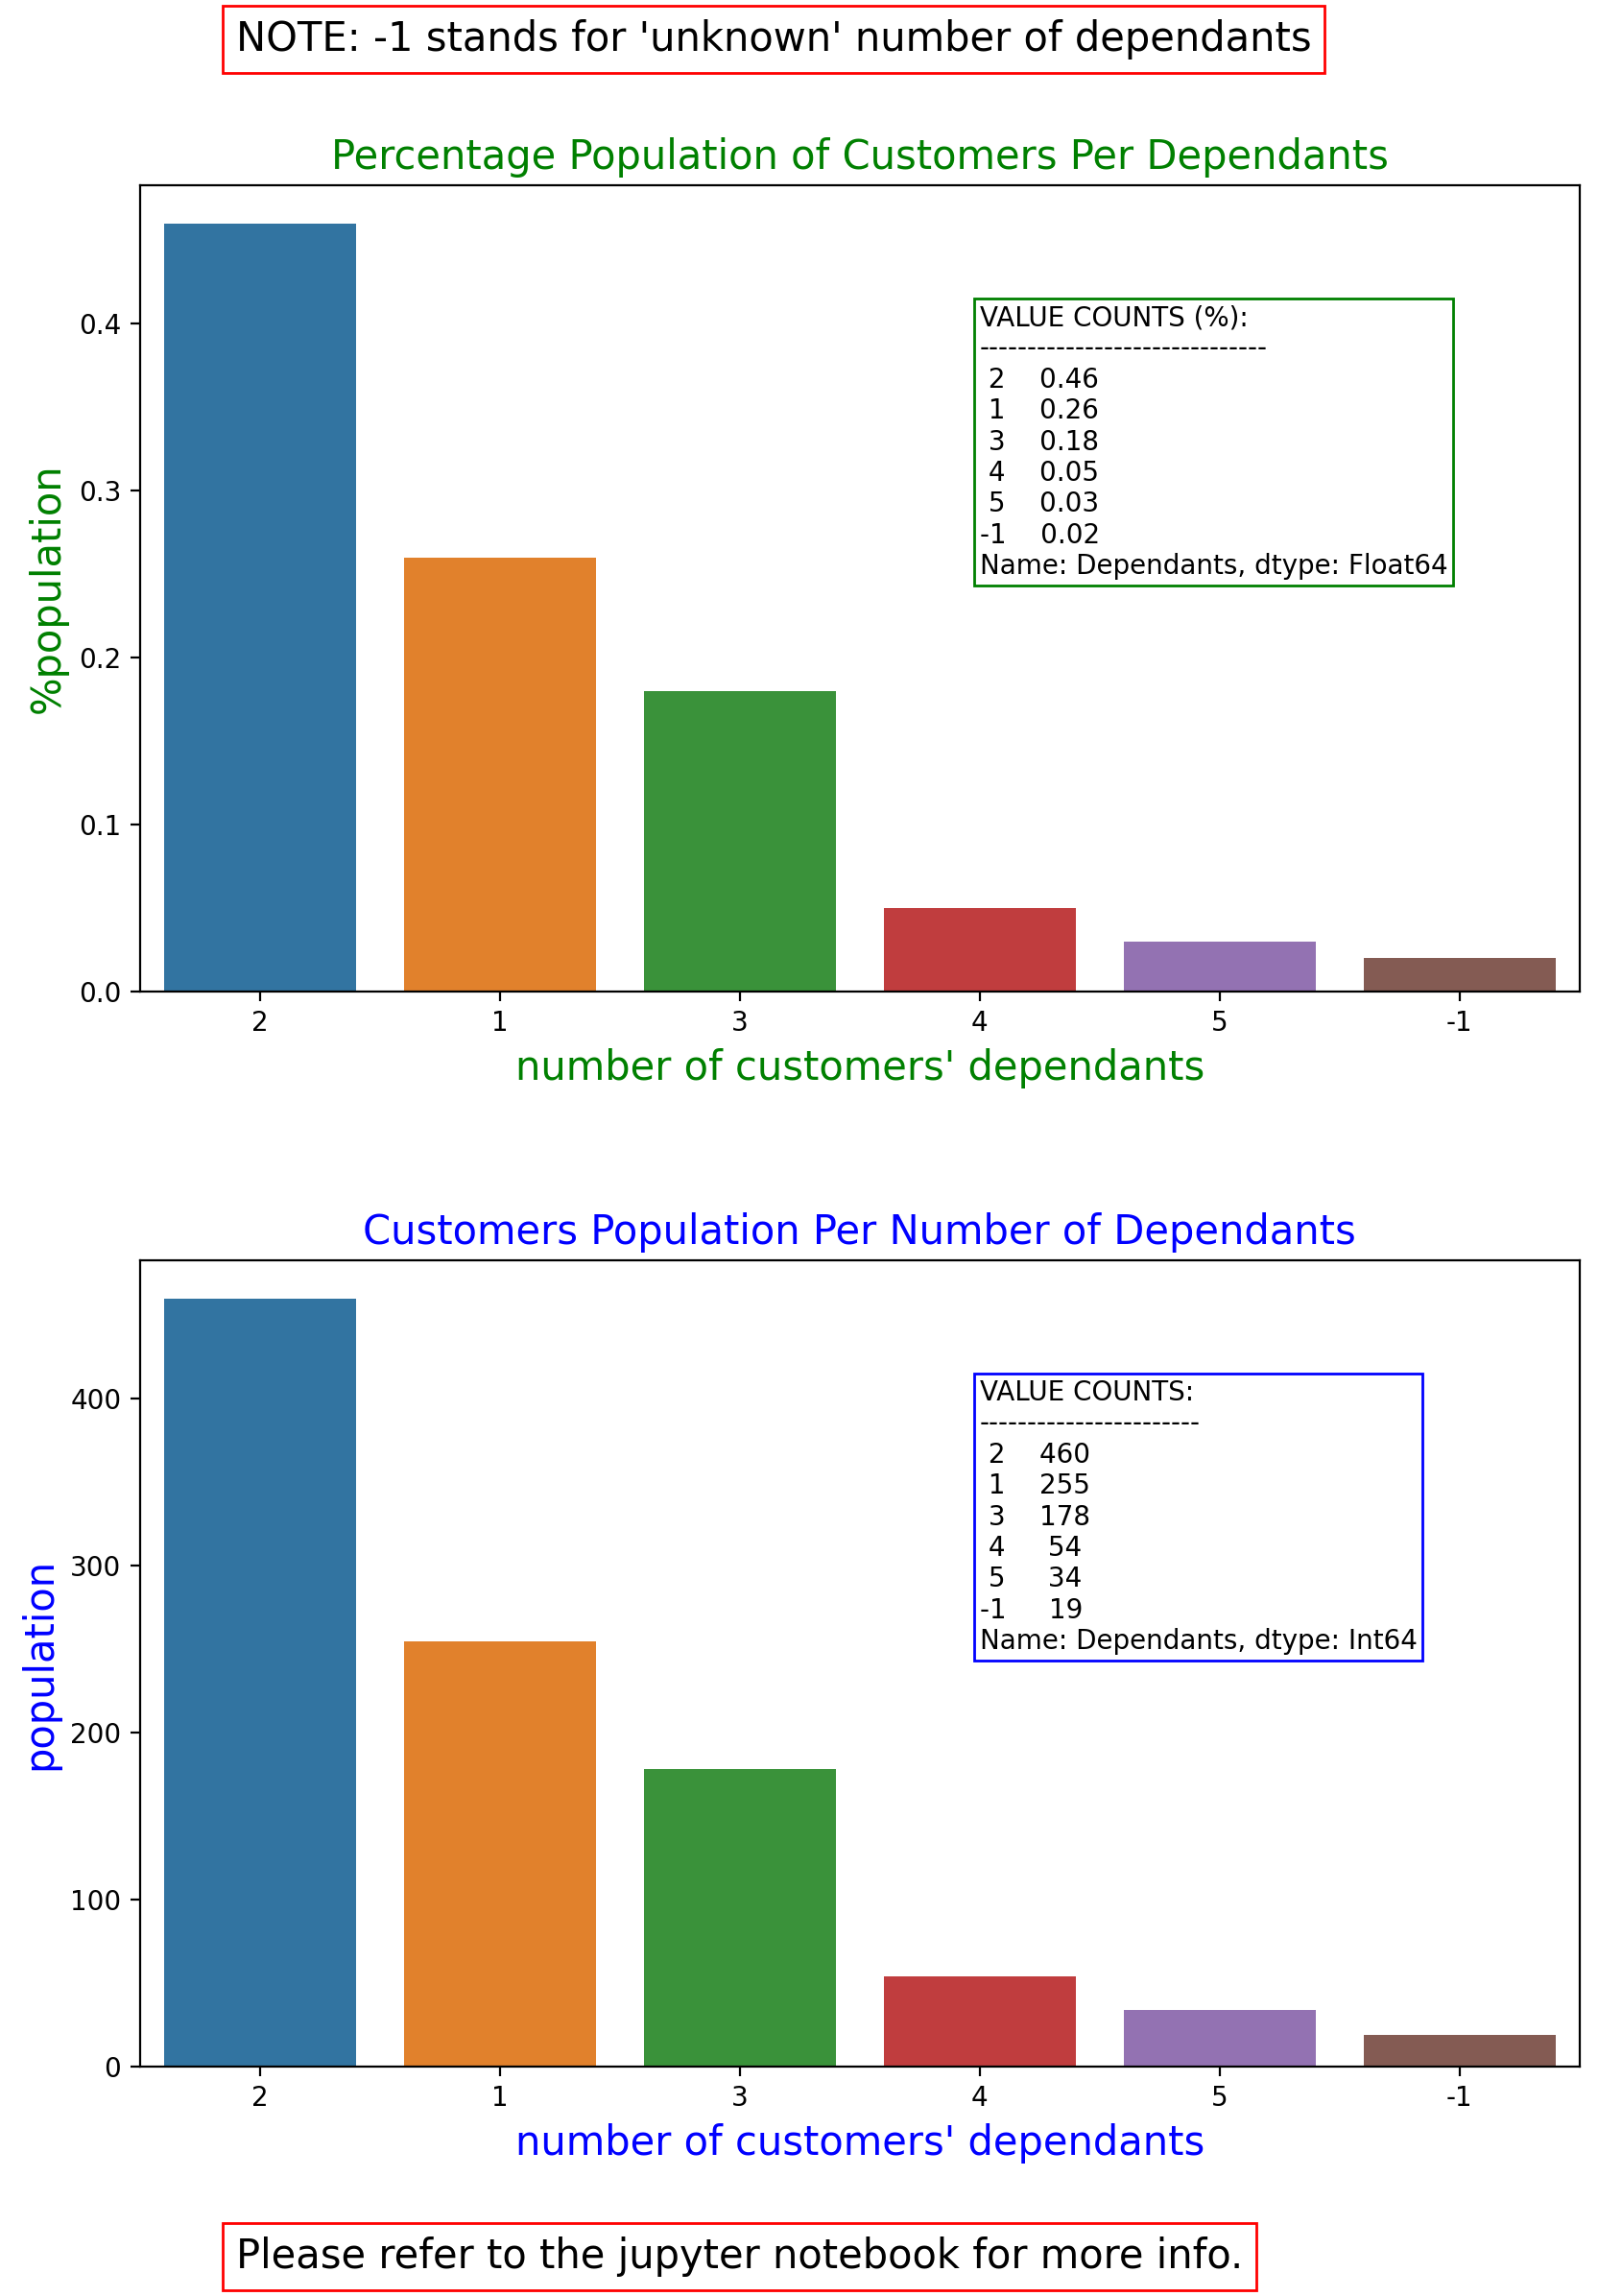

In [39]:
# set up figure and axes for plots
task_2b_fig = plt.figure(figsize=(10, 7), dpi=200)
count_ax, perc_count_ax = task_2b_fig.add_axes([0, 0, .75, 0.6]), task_2b_fig.add_axes([0, 0.8, .75, 0.6])

# main plots: 2 bar plots
bplot_count = sns.barplot(x=dep_val_count.index, y=dep_val_count, order=dep_val_count.index, ax=count_ax)
bplot_perc_count = sns.barplot(x=dep_freq_perc.index, y=dep_freq_perc, order=dep_freq_perc.index, ax=perc_count_ax)

# set up x and y axes labels
bplot_count.set_ylabel("population", fontsize=15, c='blue')
bplot_count.set_xlabel("number of customers' dependants", fontsize=15, c='blue')
bplot_perc_count.set_ylabel("%population", fontsize=15, c='green')
bplot_perc_count.set_xlabel("number of customers' dependants", fontsize=15, c='green')

# set up graph titles
bplot_count.set_title("Customers Population Per Number of Dependants", 
                   loc='center', fontsize=15, c='blue')
bplot_perc_count.set_title("Percentage Population of Customers Per Dependants",
                   loc='center', fontsize=15, c='green')

# set up textbox for further explanation
task_2b_fig.text(0.05, 1.5, "NOTE: -1 stands for 'unknown' number of dependants", fontsize=15,
                bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})
task_2b_fig.text(0.05, -0.15, "Please refer to the jupyter notebook for more info.",
                bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5}, fontsize=15)
count_ax.text(3, 250, f'VALUE COUNTS: \n{"-"*23}\n{dep_val_count}', c='black', 
              bbox={'facecolor': 'white', 'edgecolor': 'blue', 'pad': 2}, fontsize=10)

perc_count_ax.text(3, .25, f'VALUE COUNTS (%): \n{"-"*30}\n{dep_freq_perc}', 
         bbox={'facecolor': 'white', 'edgecolor': 'green', 'pad': 2}, fontsize=10)

# display plots on jupyter notebook
plt.show()

Note:<br>
The above plots show that ***90% of customers have 3 or less dependants***.<br>
That is:<br>
46% have 2 dependants;<br>
26% have 1 dependant;<br>
18% have 3 dependants.<br>
And we do not know the number of dependants for 2% of customers.

#### To save this figure to filesystem as pdf files

In [40]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_2b_dependants_count.pdf"
viz_app.fig_writer(file_name, task_2b_fig, dpi=300)

'task_2b_dependants_count.pdf'

***<center>c. Univariate plot of Customers' Age conditioned on Marital Status</center>***

***Total customers per marital status category***

In [41]:
mar_st_count = copy.deepcopy(acw_df['Marital Status']).value_counts()
print(mar_st_count)

married or civil partner    541
single                      330
divorced                     71
widowed                      58
Name: Marital Status, dtype: int64


In [42]:
print("Percentage of customers per marital status category:")
mar_st_perc = round(mar_st_count/acw_df.shape[0], 2)
print(mar_st_perc)

Percentage of customers per marital status category:
married or civil partner    0.54
single                      0.33
divorced                    0.07
widowed                     0.06
Name: Marital Status, dtype: float64


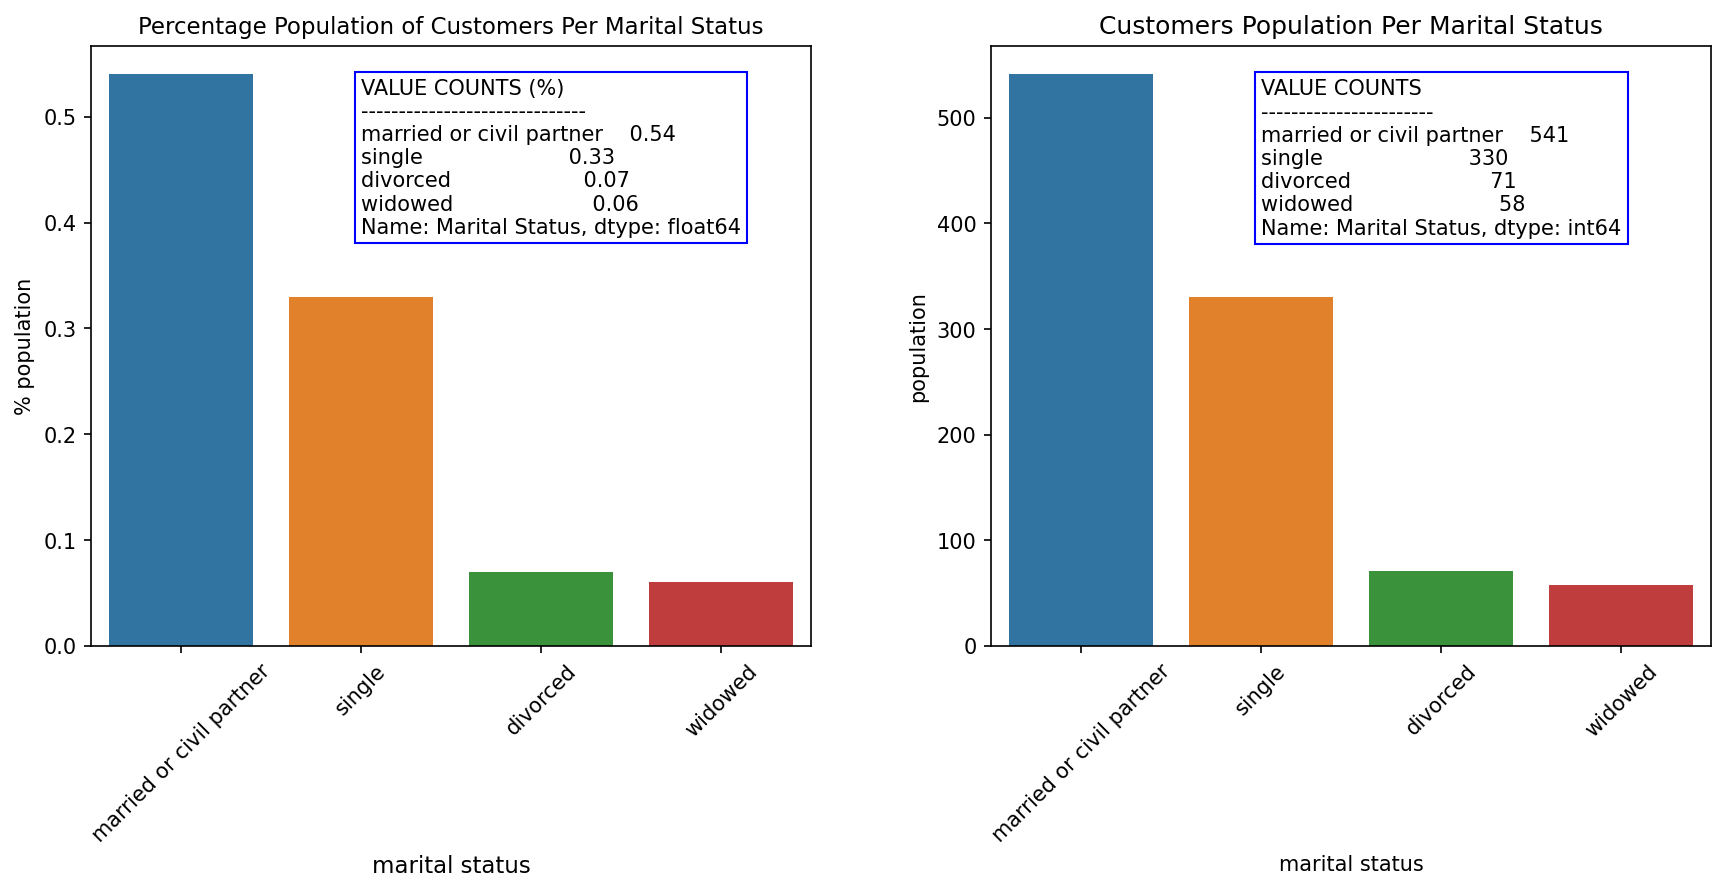

In [43]:
# set up figure and axes for plots
fig = plt.figure(figsize=(8, 4), dpi=150)
left_ax, right_ax = fig.add_axes([0.75, 0, 0.6, 1]), fig.add_axes([0, 0, 0.6, 1])

# main plots: 2 bar plots
left = sns.barplot(x=mar_st_count.index, y=mar_st_count, order=mar_st_count.index, ax=left_ax)
right = sns.barplot(x=mar_st_perc.index, y=mar_st_perc, order=mar_st_perc.index, ax=right_ax)

# set up x and y axes labels, and title for left bar graph
left.set_title("Customers Population Per Marital Status")
left.set_ylabel('population'); left.set_xlabel('marital status')
left.set_xticklabels(labels=mar_st_count.index, rotation=45)
# set up x and y axes labels, and title for right bar graph
right.set_title("Percentage Population of Customers Per Marital Status", fontsize=11)
right.set_ylabel('% population'); right.set_xlabel('marital status', fontsize=11)
right.set_xticklabels(labels=mar_st_count.index, rotation=45)

# set up textbox for further explanation
left.text(1, 390, f"VALUE COUNTS\n{'-'*23}\n{mar_st_count}",
           bbox={'facecolor': 'white', 'pad':2, "edgecolor":"blue", 'pad':3})
right.text(1, 0.39, f"VALUE COUNTS (%)\n{'-'*30}\n{mar_st_perc}",
           bbox={'facecolor': 'white', 'pad':2, "edgecolor":"blue", 'pad':3})

# display plots on jupyter notebook
plt.show()

NOTE:<br>
The figure above shows that ***87% of customers are either living with a partner, or single.***

#### To save this figure to filesystem as pdf files

In [44]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "2c1_marital_status_distribution.pdf"
viz_app.fig_writer(file_name, fig, dpi=300)

'2c1_marital_status_distribution.pdf'

***Total customers per age category***

In [45]:
ages_dist = copy.deepcopy(acw_df['Age (Years)']).value_counts()
ages_dist

48    22
89    20
22    20
56    20
20    20
      ..
47     8
19     8
24     8
75     7
44     6
Name: Age (Years), Length: 74, dtype: int64

In [46]:
print(f"There are {acw_df['Age (Years)'].nunique()} unique values for customers' ages.")

There are 74 unique values for customers' ages.


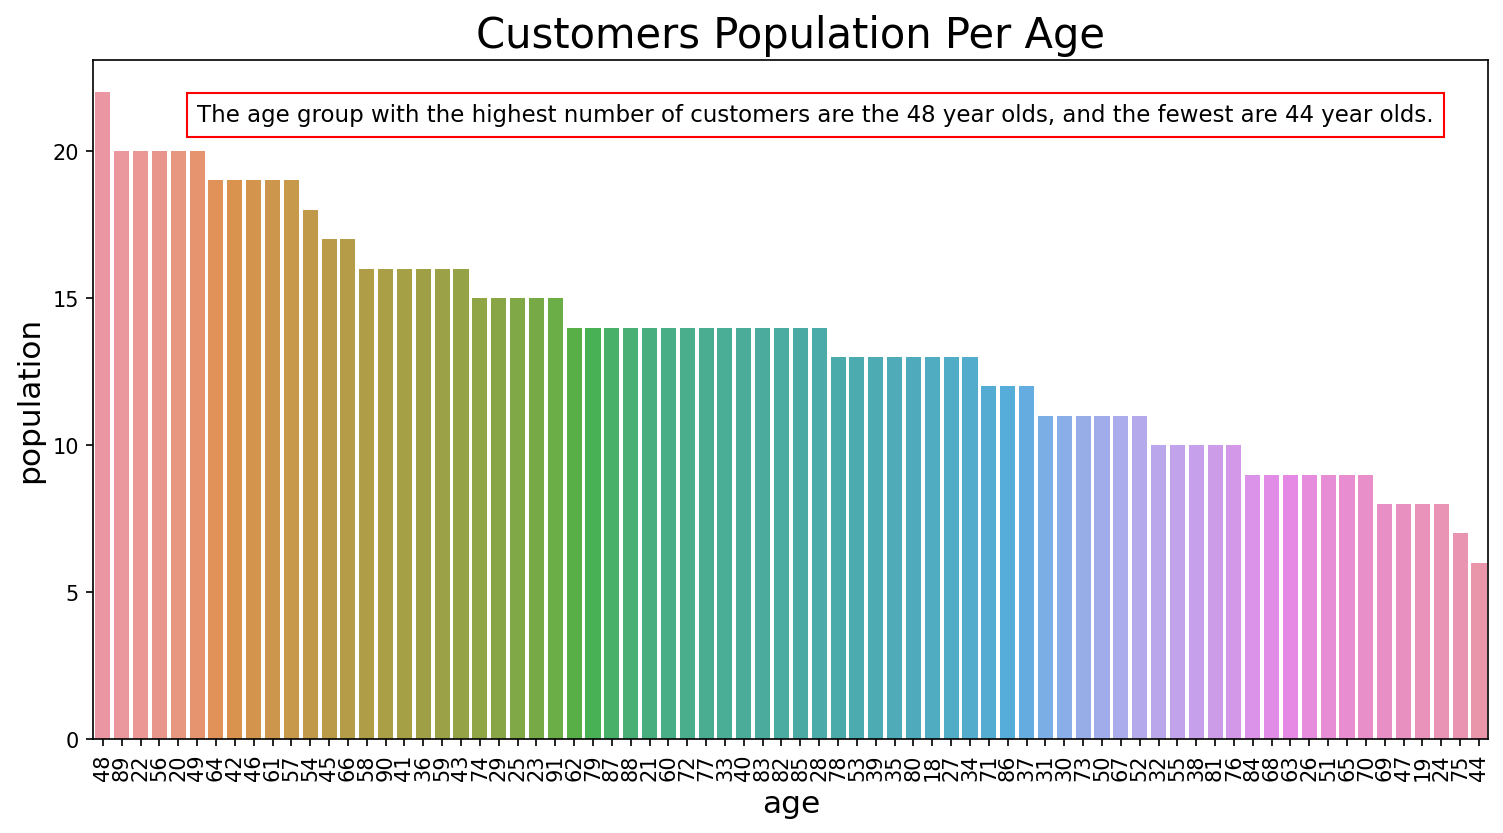

In [47]:
plt.figure(figsize=(12, 6), dpi=150)
cust_age_fig = sns.barplot(x=ages_dist.index, y=ages_dist, order=ages_dist.index)
plt.xlabel('age', fontsize=15)
plt.ylabel('population', fontsize=15)
plt.title("Customers Population Per Age", fontsize=20)
plt.xticks(rotation=90)
plt.text(5, 21., "The age group with the highest number of customers are the 48 year olds, and the fewest are 44 year olds.",
         fontsize=11, bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})
plt.show()

NOTE:<BR>
    The above figure shows the distribution of customers across ages 18-91 years.<br>
    ***The age group with the highest number of customers is 48 years, and the fewest is 44 years.***

#### To save this figure to filesystem as pdf files

In [48]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "2c2_age_distribution.pdf"
viz_app.fig_writer(file_name, cust_age_fig, dpi=300)

'2c2_age_distribution.pdf'

In [49]:
age_cond = pd.DataFrame(acw_df[['Age (Years)', 'Marital Status']].value_counts())

In [50]:
age_cond.head()

,,0
Age (Years),Marital Status,
49,married or civil partner,14
48,married or civil partner,13
56,married or civil partner,13
89,married or civil partner,11
57,married or civil partner,11


The above dataframe, age_cond, conveys the distribution of each marital status category for all 74 unique customers' age

In [51]:
# fine-tuning the above dataframe
age_cond = age_cond.reset_index()

In [52]:
# age_cond.colmns.astype(np.str_).str.replace('Age (Years)', 'age').str.replace('Marital Status', 'marital_status').str.replace('0', 'count')
print(age_cond.columns)

Index(['Age (Years)', 'Marital Status', 0], dtype='object')


In [53]:
# rename column from 0 to 'Count'
age_cond.columns = age_cond.columns.astype(np.str_).str.replace('0', 'Count')

In [54]:
age_cond.head()

,Age (Years),Marital Status,Count
0,49,married or civil partner,14
1,48,married or civil partner,13
2,56,married or civil partner,13
3,89,married or civil partner,11
4,57,married or civil partner,11


#### Highest occurring marital status category per unique age

In [55]:
ages_per_status = age_cond.sort_values(['Age (Years)', 'Count', 'Marital Status'], ascending=[True, False, True]).drop_duplicates(['Age (Years)'])
ages_per_status

,Age (Years),Marital Status,Count
27,18,married or civil partner,8
102,19,married or civil partner,5
10,20,married or civil partner,10
101,21,married or civil partner,5
7,22,married or civil partner,11
...,...,...,...
25,87,married or civil partner,8
52,88,single,7
3,89,married or civil partner,11
22,90,married or civil partner,8


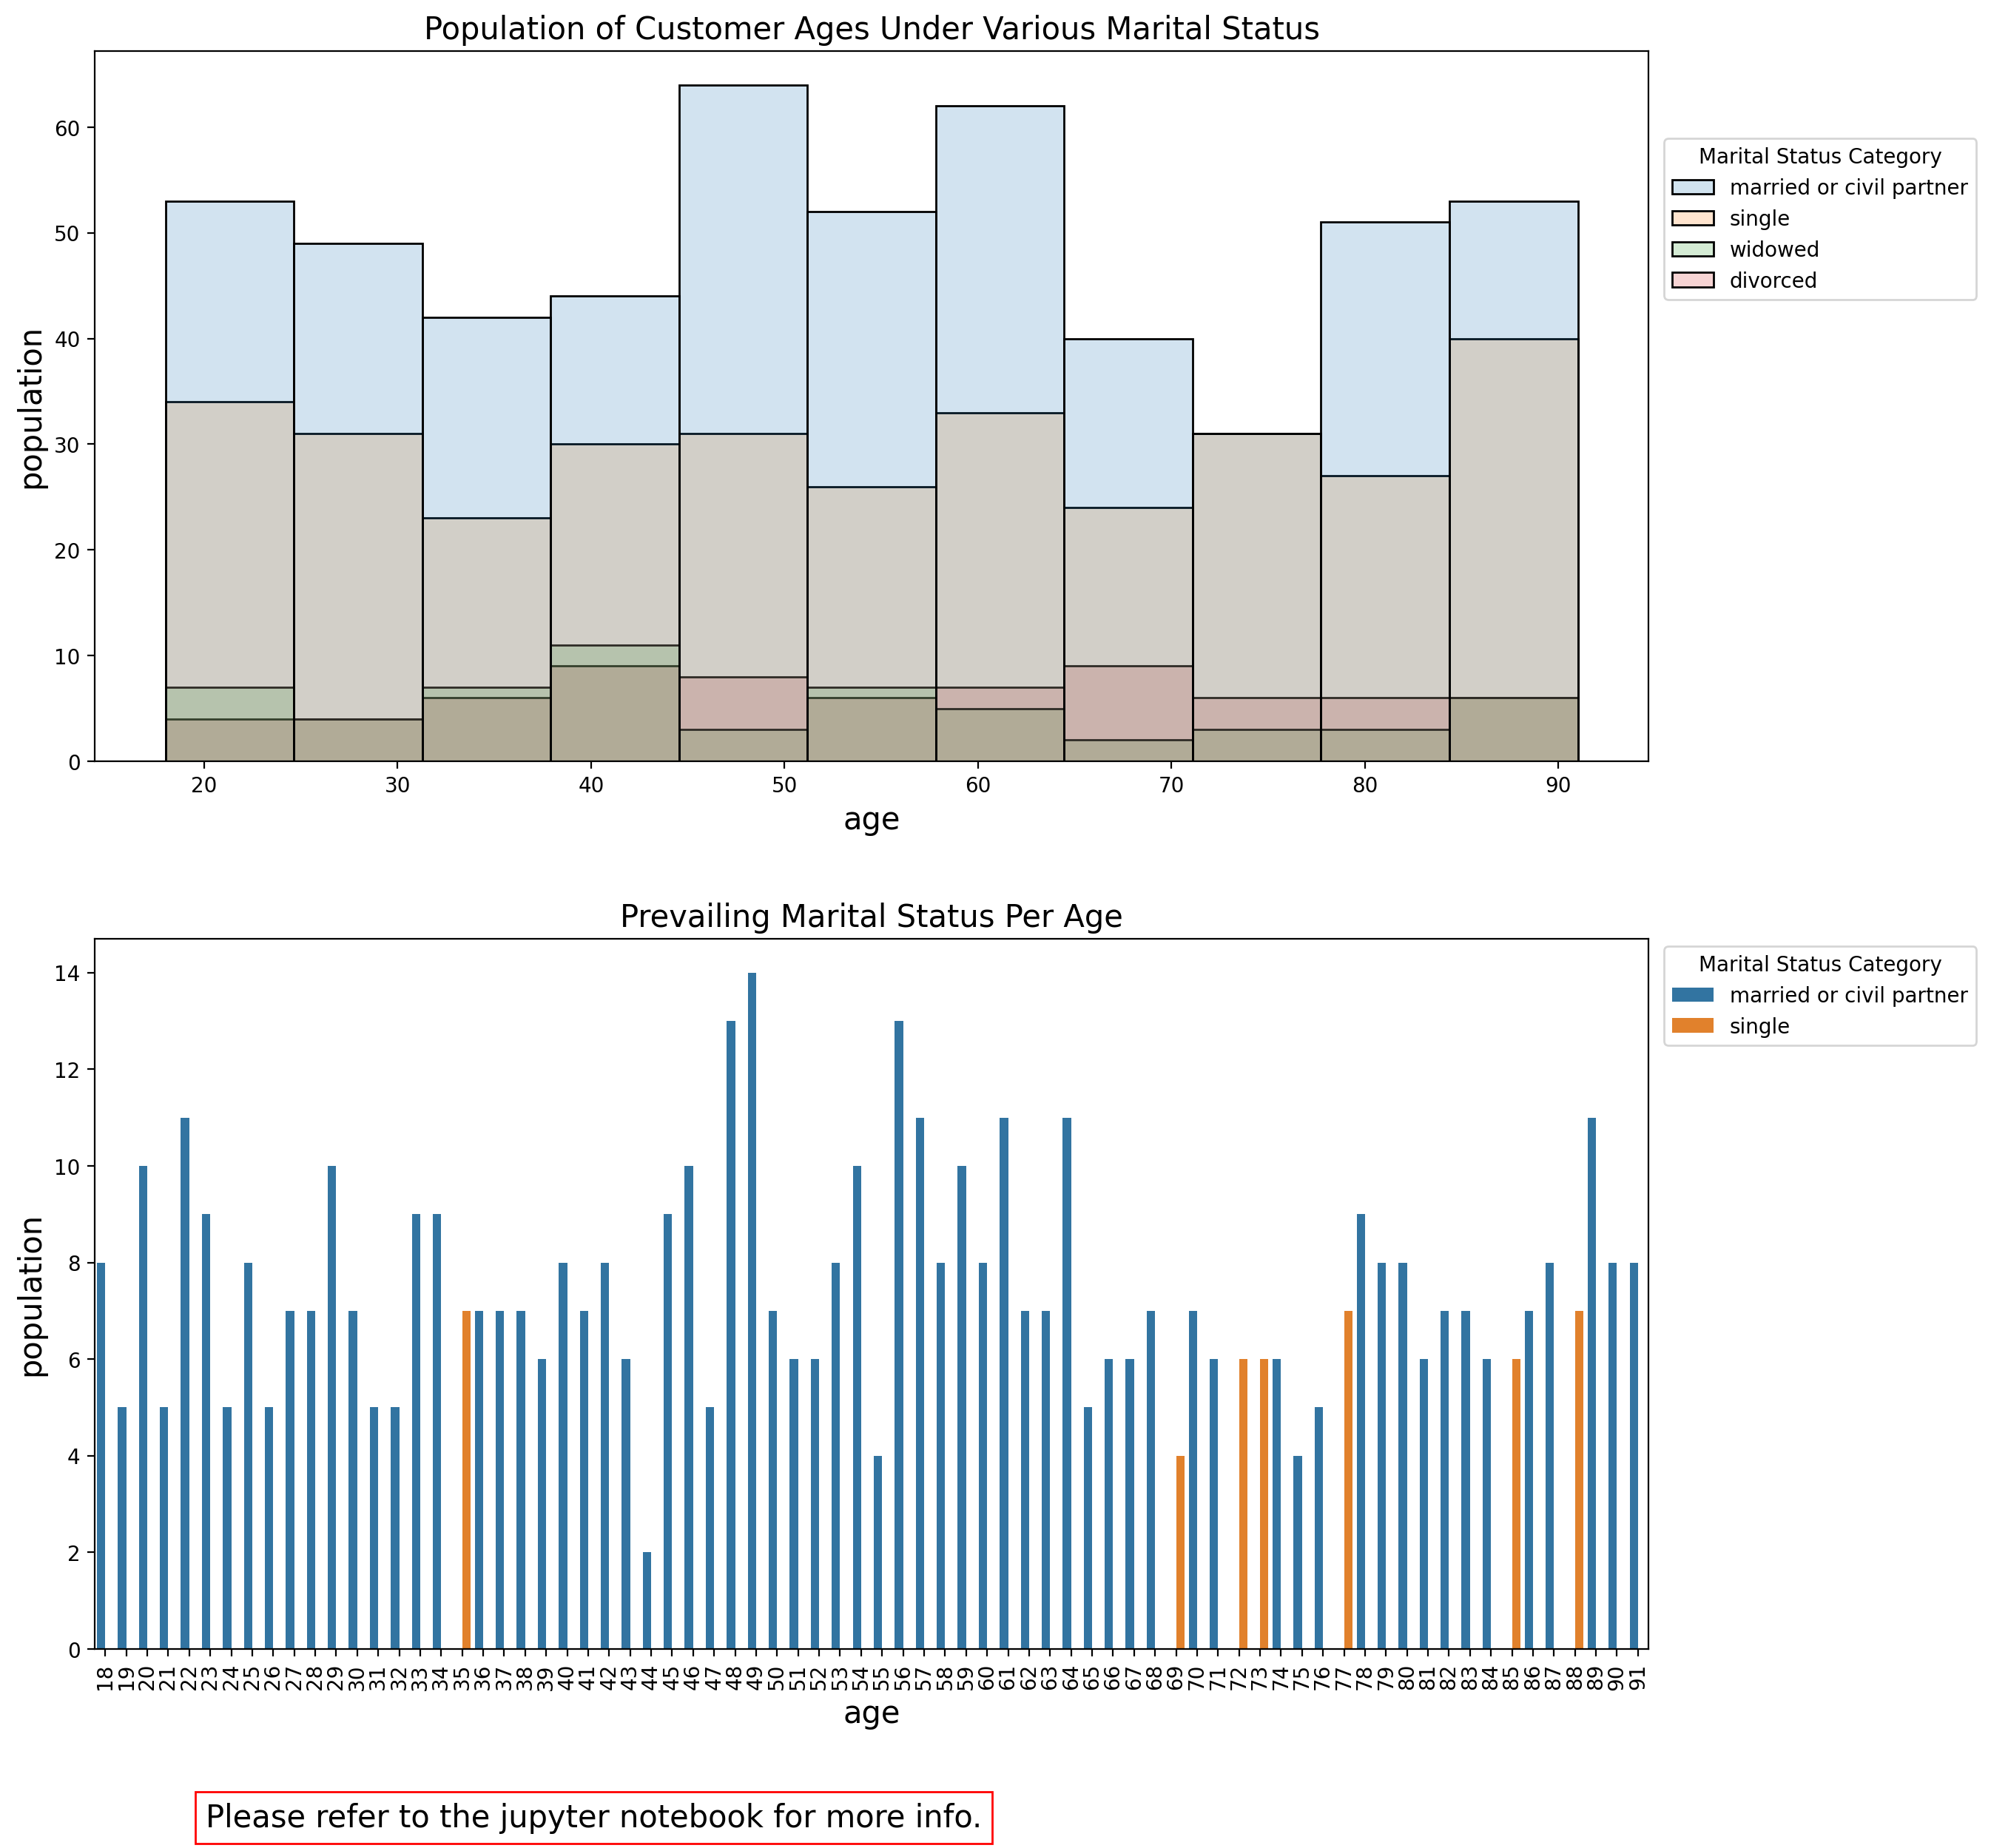

In [56]:
# set up figure and axes for plots
task_2c_fig = plt.figure(figsize=(15, 8), dpi=200)
ax1, ax2 = task_2c_fig.add_axes([0, 0, 0.7, 0.6]), task_2c_fig.add_axes([0, 0.75, 0.7, 0.6])

# main plots: bar graph and histogram
bplot = sns.barplot(x=ages_per_status['Age (Years)'], hue=ages_per_status['Marital Status'],
                       y=ages_per_status['Count'], ax=ax1)
hplot = sns.histplot(data=acw_df, x='Age (Years)', hue='Marital Status', alpha=.2, ax=ax2)

bplot.set_title("Prevailing Marital Status Per Age", fontsize=15)
hplot.set_title("Population of Customer Ages Under Various Marital Status", fontsize=15)

# adjust position of legend on both graphs
sns.move_legend(bplot, loc=[1.01, .85], title='Marital Status Category')
sns.move_legend(hplot, loc=[1.01, 0.65], title='Marital Status Category')

bplot.set_xticklabels(ages_per_status['Age (Years)'], rotation=90, fontsize=10)
bplot.set_ylabel('population', fontsize=15); bplot.set_xlabel("age", fontsize=15)
hplot.set_ylabel("population", fontsize=15); hplot.set_xlabel("age", fontsize=15)

task_2c_fig.text(0.05, -0.15, "Please refer to the jupyter notebook for more info.",
                fontsize=15, bbox={'edgecolor':'red', 'facecolor':'white', 'pad':5})
plt.show()

#### NOTE:
**Histogram (top)** shows us that the top two marital status of customers across ages 18-91 years are:<br>
1. married or civil partner
2. single<br>
**Bar graph (bottom):**<br>
We can conclude that, across ages 18-91 years, ***customers are predominantly living with a married or civil partner***,<br>
Except a few age categories (ages: 35, 69, 72, 73, 77, 86, and 88 years) that are dominated by single customers.

#### To save this figure to filesystem as pdf files

In [57]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_2c_ages_per_marital_status.pdf"
viz_app.fig_writer(file_name, task_2c_fig, dpi=300)

'task_2c_ages_per_marital_status.pdf'

___

### Task 3. 
Perform ***multivariate plots*** with the following data attributes: <br>
a. Commuted distance against salary. <br>
b. Age against Salary <br>
c. Age against Salary conditioned by Dependants

### SOLUTION

Create a dataframe from the acw_df dataframe, comprising the above four columns, and assign to a variable, 'selected_series'.

In [58]:
selected_series = copy.deepcopy(acw_df[['Distance Commuted to Work (miles)', 'Age (Years)', 'Yearly Salary (£)', 'Dependants']])
selected_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Distance Commuted to Work (miles)  1000 non-null   float64
 1   Age (Years)                        1000 non-null   int64  
 2   Yearly Salary (£)                  1000 non-null   int64  
 3   Dependants                         1000 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2)
memory usage: 32.4 KB


In [59]:
selected_series.head()

,Distance Commuted to Work (miles),Age (Years),Yearly Salary (£),Dependants
0,0.00,89,72838,3
1,13.72,46,54016,1
2,16.02,22,68049,1
3,19.35,56,91337,2
4,5.94,57,18446,2


***<center>a. Multivariate Plot of Commuted distance vs Salary</center>***

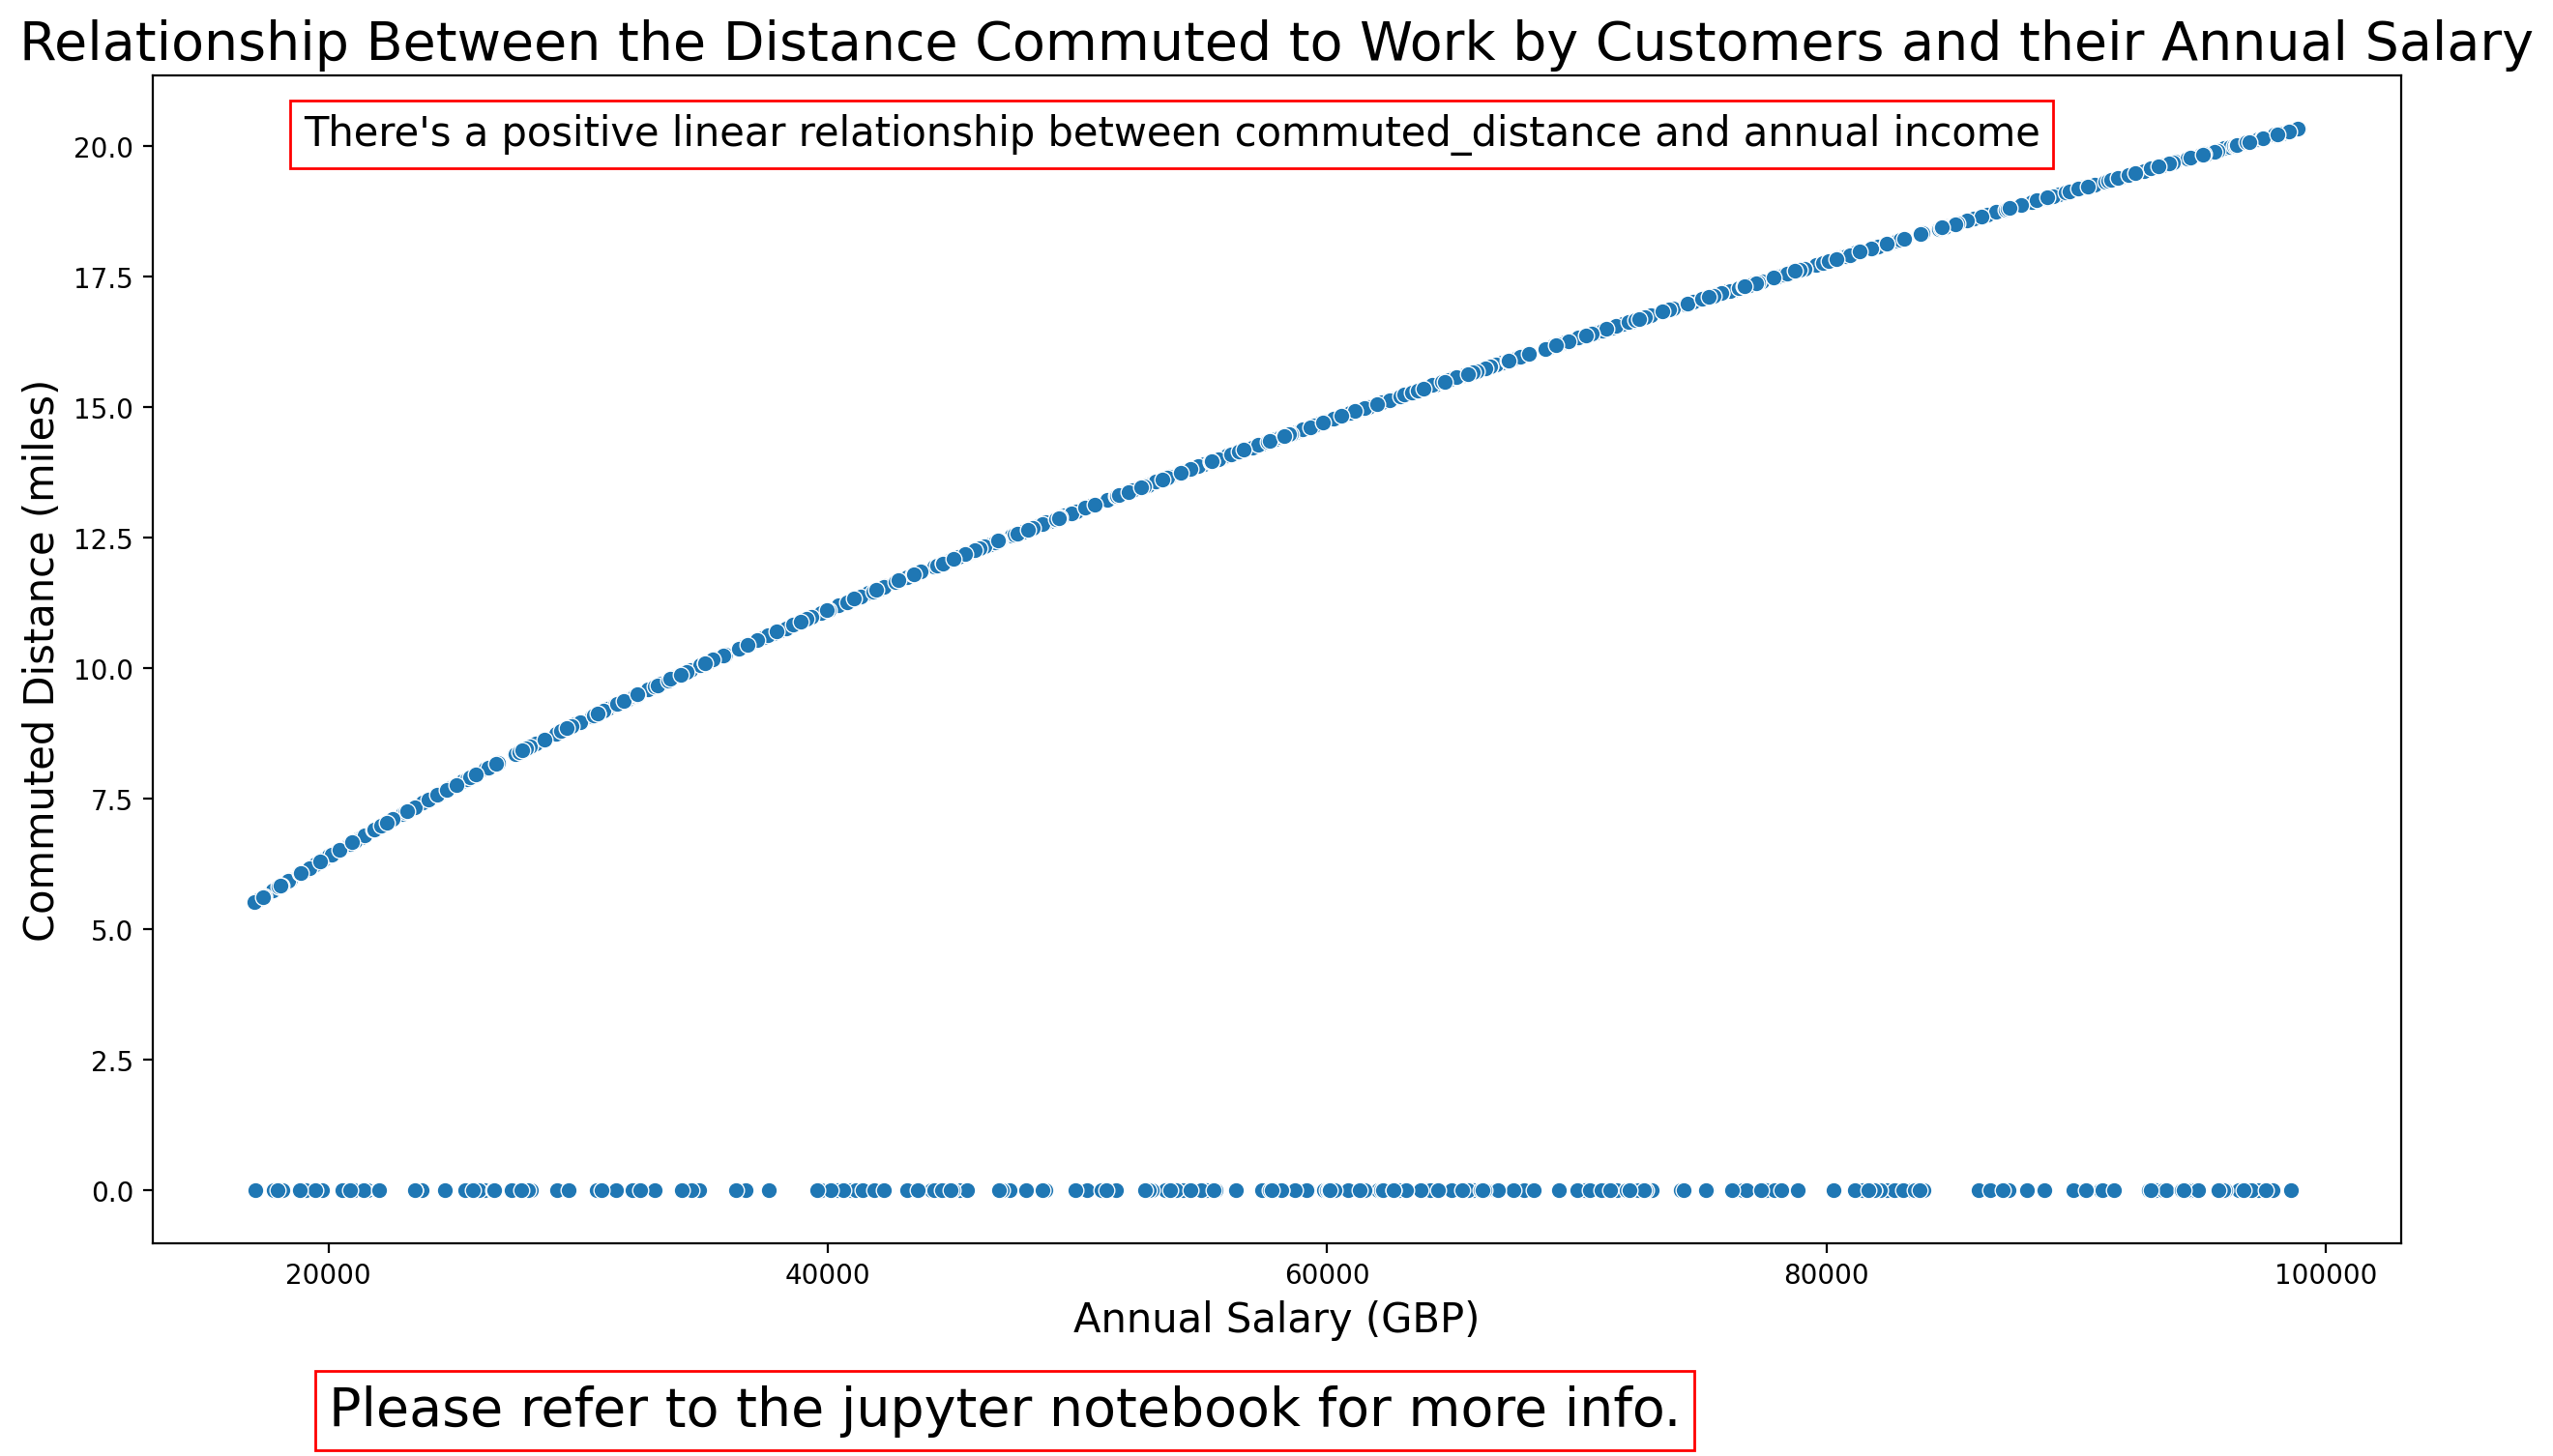

In [60]:
plt.figure(figsize=(15, 8), dpi=200)

task_3a_fig = sns.scatterplot(data=selected_series, x='Yearly Salary (£)', y='Distance Commuted to Work (miles)')

task_3a_fig.set_xlabel('Annual Salary (GBP)', fontsize=15)
task_3a_fig.set_ylabel('Commuted Distance (miles)', fontsize=15)
task_3a_fig.set_title("Relationship Between the Distance Commuted to Work by Customers and their Annual Salary",
                      fontsize=20)

task_3a_fig.text(19000, 20.01, "There's a positive linear relationship between commuted_distance and annual income",
                fontsize=15, bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})

plt.text(20000, -4.5, "Please refer to the jupyter notebook for more info.",
                fontsize=20, bbox={'edgecolor':'red', 'facecolor':'white', 'pad':5})

plt.show()

NOTE:<BR>
From the above plot, There are two categories of customers in terms of distance commuted to work:<br>
a) those who do NOT go to a workplace, ***RETIRED***.<br>
b) those who have to travel varying distances in order to get to their workplace, ***EMPLOYED***.<br><br>
Among those who commute to work:<br>
    ***There is a strong positive linear relationship between distance travelled and their annual income.***<br>
That is, increase in annual salary corresponds to an increase in their commuted distance.<br><br>
    As for those who do not commute to work (ie, retired):<br>
    The plot is useless. As one cannot reach a reasonable conclusion about a relationship between both variables.

#### To save this figure to filesystem as pdf files

In [61]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_3a_commuted_distance_vs_salary.pdf"
viz_app.fig_writer(file_name, task_3a_fig, dpi=300)

'task_3a_commuted_distance_vs_salary.pdf'

***<center>b. Multivariate Plot of Customers' Age Against Salary</center>***

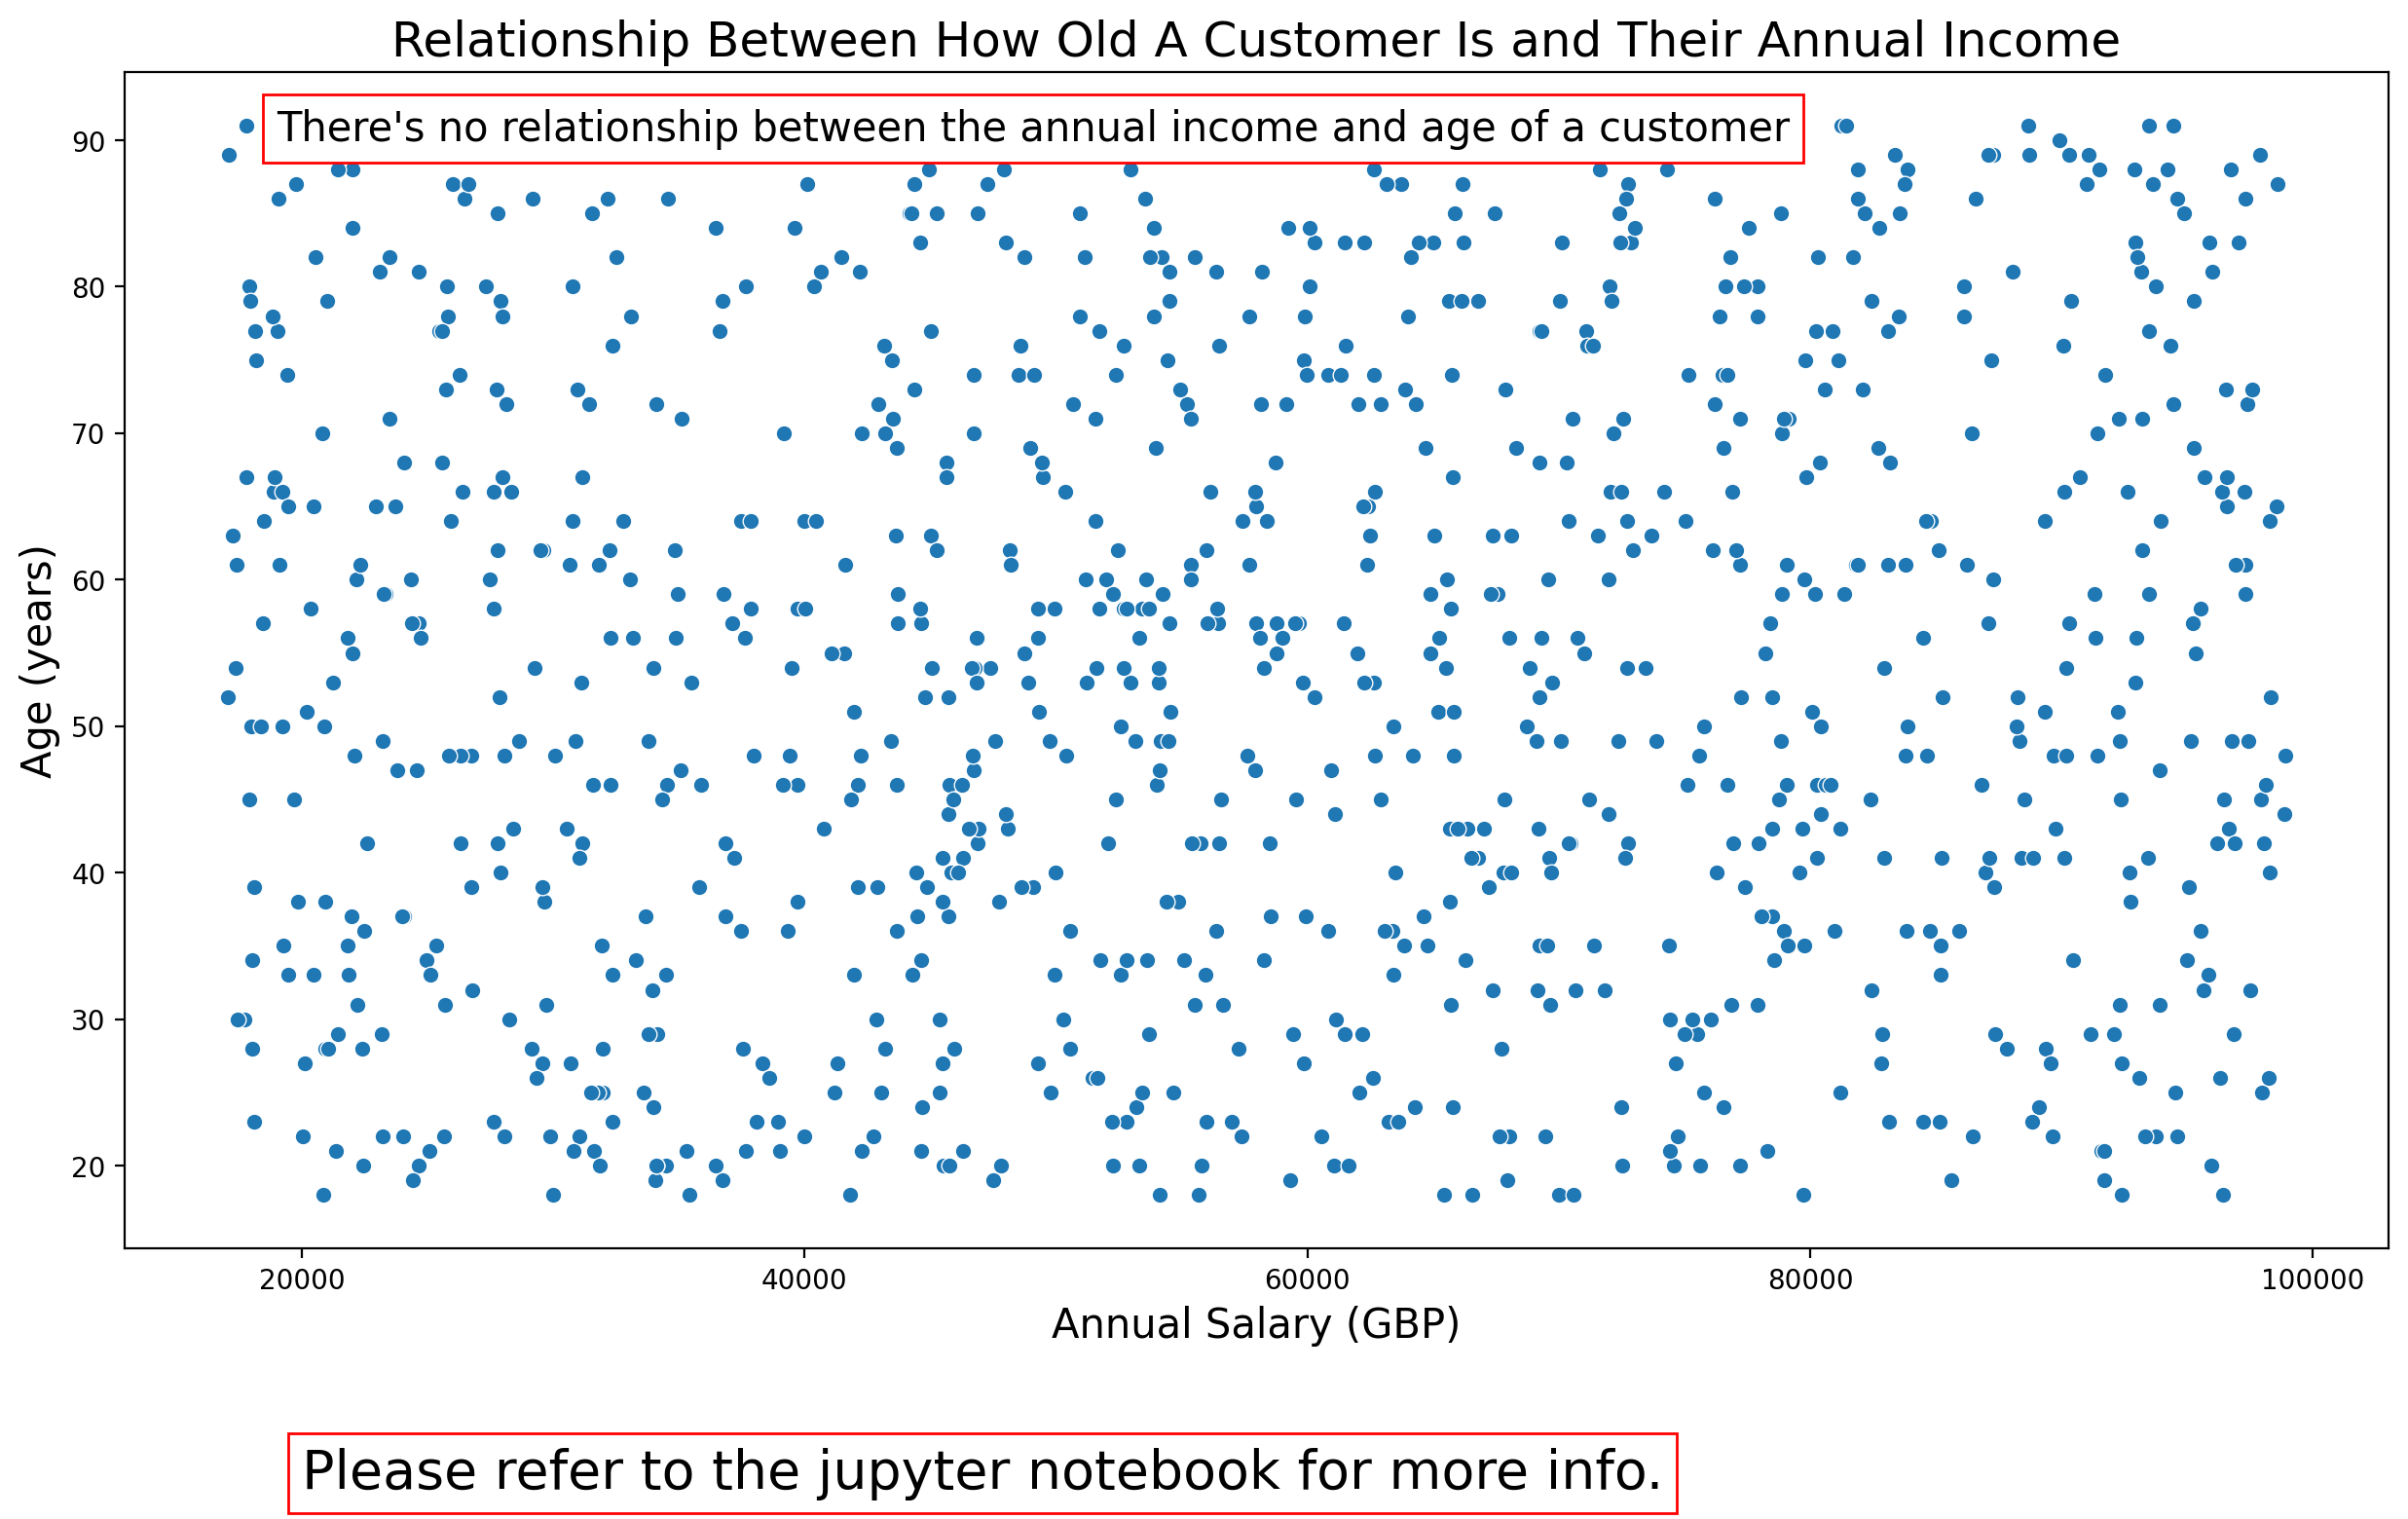

In [62]:
plt.figure(figsize=(15, 8), dpi=200)

task_3b_fig = sns.scatterplot(data=selected_series, x='Yearly Salary (£)', y='Age (Years)')

task_3b_fig.set_xlabel("Annual Salary (GBP)", fontsize=15)
task_3b_fig.set_ylabel("Age (years)", fontsize=15)

task_3b_fig.set_title("Relationship Between How Old A Customer Is and Their Annual Income", fontsize=18)

task_3b_fig.text(19000, 90, "There's no relationship between the annual income and age of a customer",
                fontsize=15, bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})

task_3b_fig.text(20000, -2, "Please refer to the jupyter notebook for more info.",
                fontsize=20, bbox={'edgecolor':'red', 'facecolor':'white', 'pad':5})
plt.show()

NOTE:<br>
From the above plot, it looks like ***there is no relationship between a customer's age and their annual salary.***<BR>
    I find this a bit strange, because I was expecting to see a positive linear relationship<br>
    where an increase in age would correspond to an increase in salary.<br>
    The reason being that most of the factors that determine the salary/income of employees<br>
    such as ***experience, skills, and level of education,*** normally tend to increase with time/age.<br>

#### To save this figure to filesystem as pdf files

In [63]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_3b_customers_age_vs_salary.pdf"
viz_app.fig_writer(file_name, task_3b_fig, dpi=300)

'task_3b_customers_age_vs_salary.pdf'

***<center>c. Multivariate Plot of Age Vs. Salary conditioned by Dependants</center>***

Create a categorical column, 'Dependants Category', by transforming the numeric values in the Dependants column into labels.<BR>
    Where:<br>
    1 == 'one',<br>
    2 == 'two',<br>
    3 == 'three',<br>
    4 == 'four',<br>
    5 == 'five',<br>
    -999 == 'unknown'</BR>
This would make it easier to condition (hue) the plot.<br>

In [64]:
selected_series['Dependants Category'] = pd.cut(selected_series['Dependants'], [-2, 0, 1, 2, 3, 4, 5], labels=['unknown', 'one', 'two', 'three', 'four', 'five'])

In [65]:
selected_series.head()

,Distance Commuted to Work (miles),Age (Years),Yearly Salary (£),Dependants,Dependants Category
0,0.00,89,72838,3,three
1,13.72,46,54016,1,one
2,16.02,22,68049,1,one
3,19.35,56,91337,2,two
4,5.94,57,18446,2,two


In [66]:
# check for missing data label, 'unknown'
selected_series.loc[~selected_series['Dependants'].isin([1, 2, 3, 4, 5])].iloc[:3]

,Distance Commuted to Work (miles),Age (Years),Yearly Salary (£),Dependants,Dependants Category
21,11.98,40,44434,-1,unknown
109,16.19,32,69158,-1,unknown
179,12.42,47,46737,-1,unknown


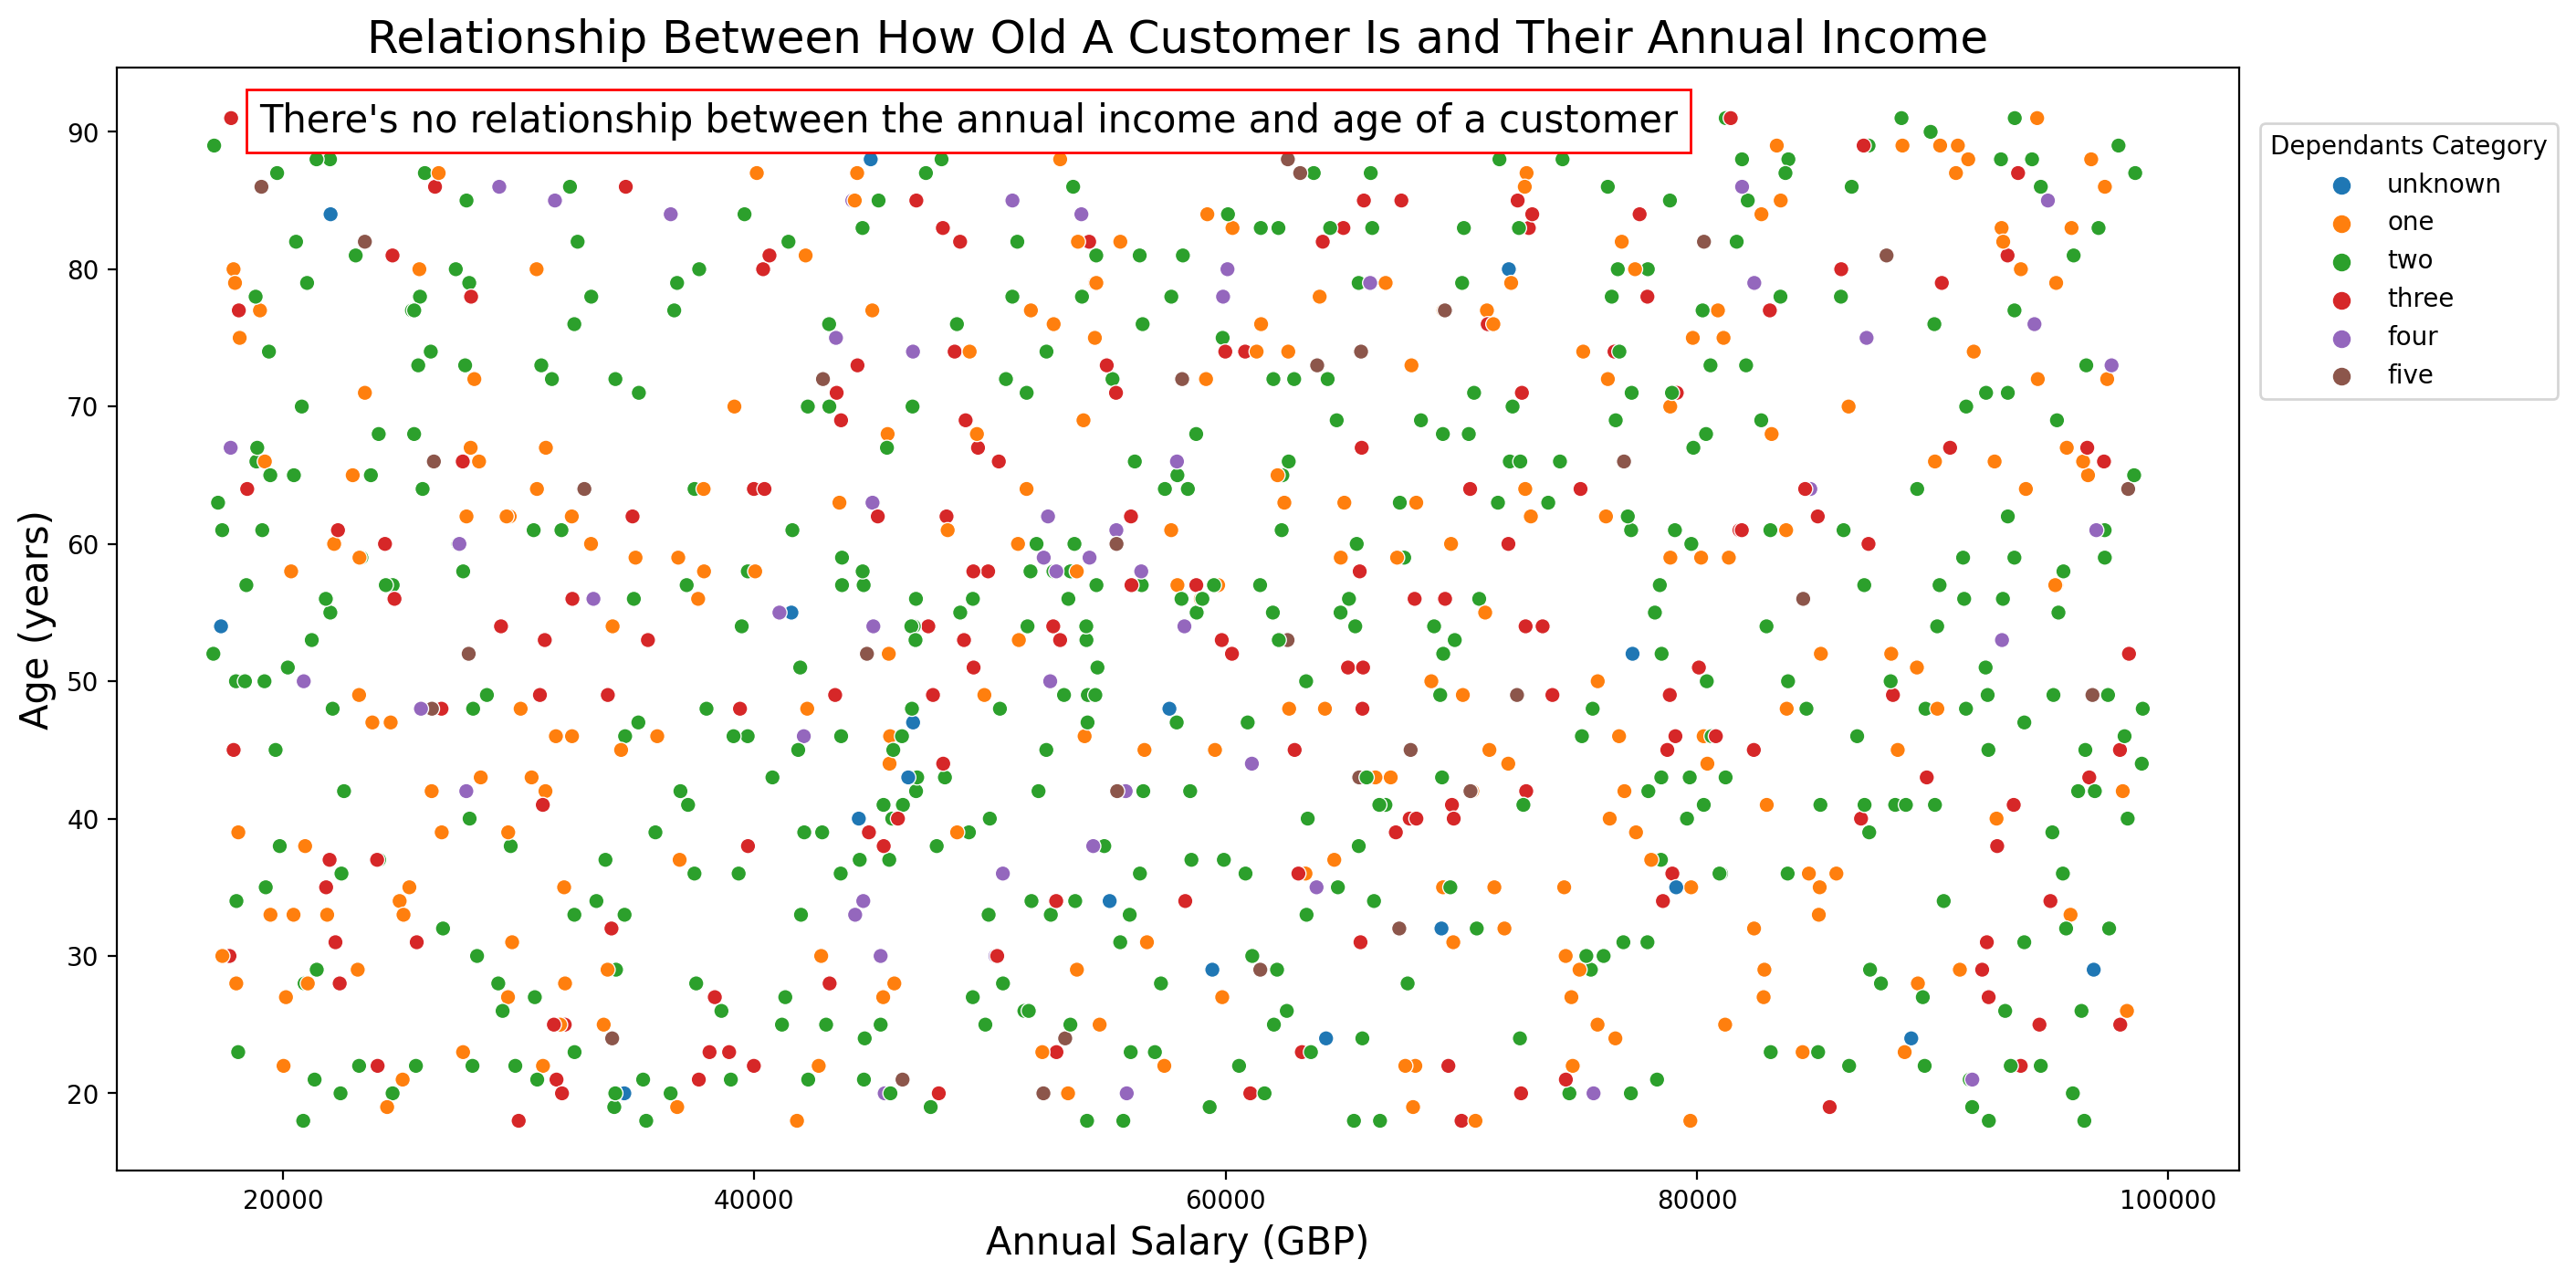

In [67]:
plt.figure(figsize=(15, 8), dpi=200)

task_3c_fig = sns.scatterplot(data=selected_series, x='Yearly Salary (£)', y='Age (Years)', hue='Dependants Category')

sns.move_legend(task_3c_fig, loc=[1.01, .7])
task_3c_fig.set_xlabel("Annual Salary (GBP)", fontsize=15)
task_3c_fig.set_ylabel("Age (years)", fontsize=15)

task_3c_fig.set_title("Relationship Between How Old A Customer Is and Their Annual Income", fontsize=18)

task_3c_fig.text(19000, 90, "There's no relationship between the annual income and age of a customer",
                fontsize=15, bbox={'facecolor':'white', 'edgecolor':'red', 'pad':5})
plt.show()

NOTE:<BR>
    The figure above shows that no relationship exists between Age and Annual Salary (grouped by number of customers' dependants).

#### To save this figure to filesystem as pdf files

In [68]:
# setting the dpi (dots per inches) to 300 for pdf files
file_name = "task_3c_age_vs_salary_per_dependants.pdf"
viz_app.fig_writer(file_name, task_3c_fig, dpi=300)

'task_3c_age_vs_salary_per_dependants.pdf'

___

### Task 4.
Your client would like the ability to save the plots which you have produced. <br>
Provide a Notebook cell which can do this.

### SOLUTION

#### Saving figures to filesystem as pdf files

In [69]:
file_names = ["task_2a_ages_distribution.pdf", "task_2b_dependants_count.pdf",
          "task_2c_ages_per_marital_status.pdf", "task_3a_commuted_distance_vs_salary.pdf", 
          "task_3b_customers_age_vs_salary.pdf", "task_3c_age_vs_salary_per_dependants.pdf"]

fig_objs = [task_2a_fig, task_2b_fig, task_2c_fig, 
            task_3a_fig, task_3b_fig, task_3c_fig]

for fname, fig in zip(file_names, fig_objs):
    viz_app.fig_writer(fname, fig, dpi=300)
    print(f'{fname} has been created.')

task_2a_ages_distribution.pdf has been created.
task_2b_dependants_count.pdf has been created.
task_2c_ages_per_marital_status.pdf has been created.
task_3a_commuted_distance_vs_salary.pdf has been created.
task_3b_customers_age_vs_salary.pdf has been created.
task_3c_age_vs_salary_per_dependants.pdf has been created.


___

**<center>DATA VISUALIZATION TASKS DONE!**

___